Look at graphs generated from Generate_graphs_case_1

In [11]:
import pickle
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tqdm
import sys
import datetime
import seaborn as sns

# My scripts
# add path to other folders, to import
import sys, os
sys.path.append(os.path.abspath(".."))
from util import plot_avg_degree, plot_G_density, plot_G_signs, fetch_raw_data, avg_degree, color_dark, cnt_pos_neg, plot_weight_signs

Load raw data

In [12]:
return_pivot, esg_pivot, sector_classification = fetch_raw_data("C:/Users/User/Code/MMD_Graph_Diversification/")

2014-10-01 00:00:00
2022-02-01 00:00:00


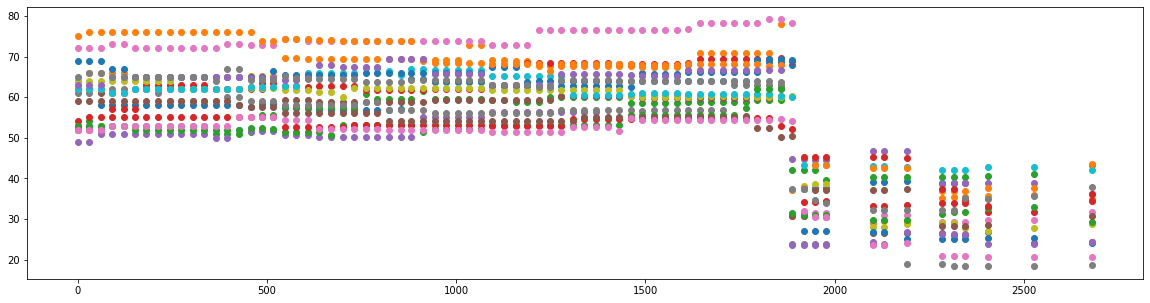

In [13]:
ind = esg_pivot.loc[:,np.isin(esg_pivot.columns, sector_classification['Energy'])]

fig, ax = plt.subplots(1,1, figsize = (20,5))
for i in range(ind.shape[1]):

    ax.scatter(range(ind.shape[0]),ind.iloc[:,i])


# Individual TEST - INDUSTRIALS

In [14]:
with open(f'../data/Graphs/TEST_d_1_winlen_300_gest_huge_glasso_ebic_scale_False_trans_nonparanormal.pkl', 'rb') as f:
    scale_F_nonparanormal = pickle.load(f)
with open(f'../data/Graphs/TEST_d_1_winlen_300_gest_huge_glasso_ebic_scale_True_trans_nonparanormal.pkl', 'rb') as f:
    scale_T_nonparanormal = pickle.load(f)
with open(f'../data/Graphs/TEST_d_1_winlen_300_gest_huge_glasso_ebic_scale_False_trans_None.pkl', 'rb') as f:
    scale_F_none = pickle.load(f)
with open(f'../data/Graphs/TEST_d_1_winlen_300_gest_huge_glasso_ebic_scale_True_trans_None.pkl', 'rb') as f:
    scale_T_none = pickle.load(f)


c:\Users\User\Code\MMD_Graph_Diversification\util.py:171: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight = 'weight').todense()
c:\Users\User\Code\MMD_Graph_Diversification\util.py:175: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight = 'weight').todense()
c:\Users\User\Code\MMD_Graph_Diversification\util.py:171: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight = 'weight').todense()
c:\Users\User\Code\MMD_Graph_Diversification\util.py:175: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight = 'weight').todense()
c:\Users\User\Code\MMD_Graph_Diversification\util.py:171: FutureWarning: adjacency_matrix will return a scipy.sparse array inste

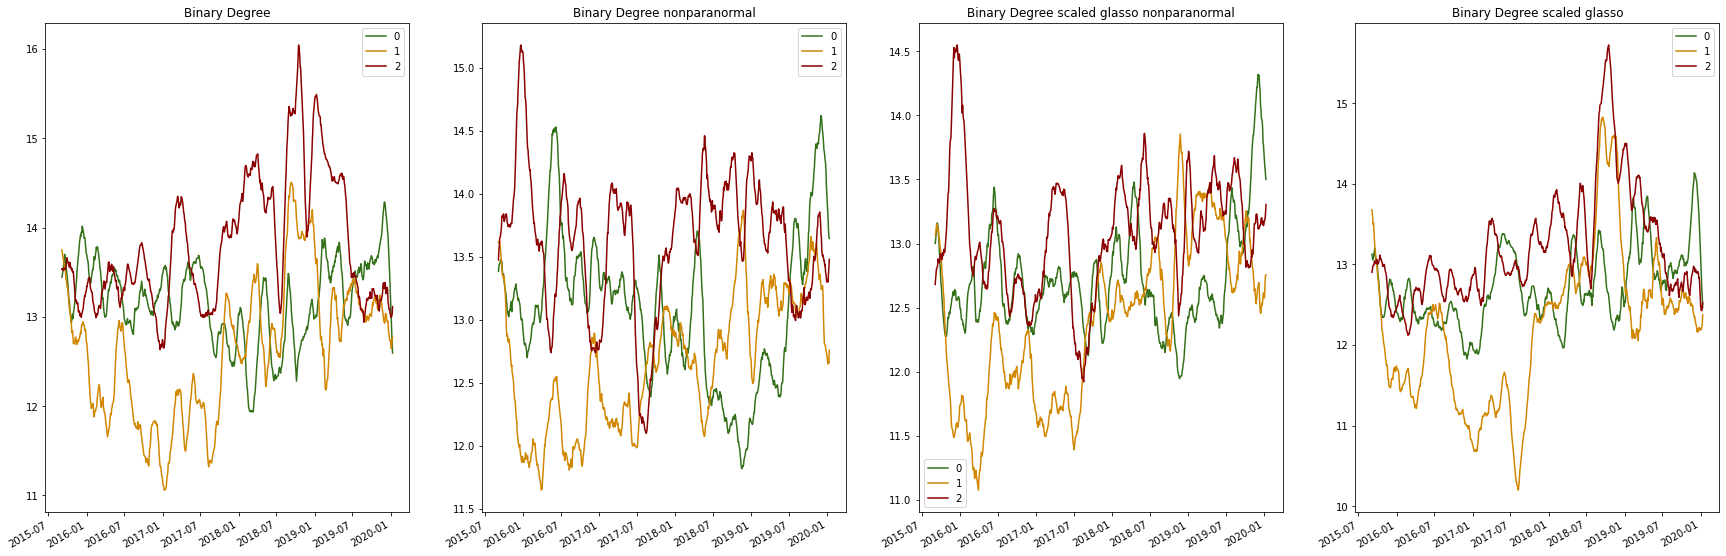

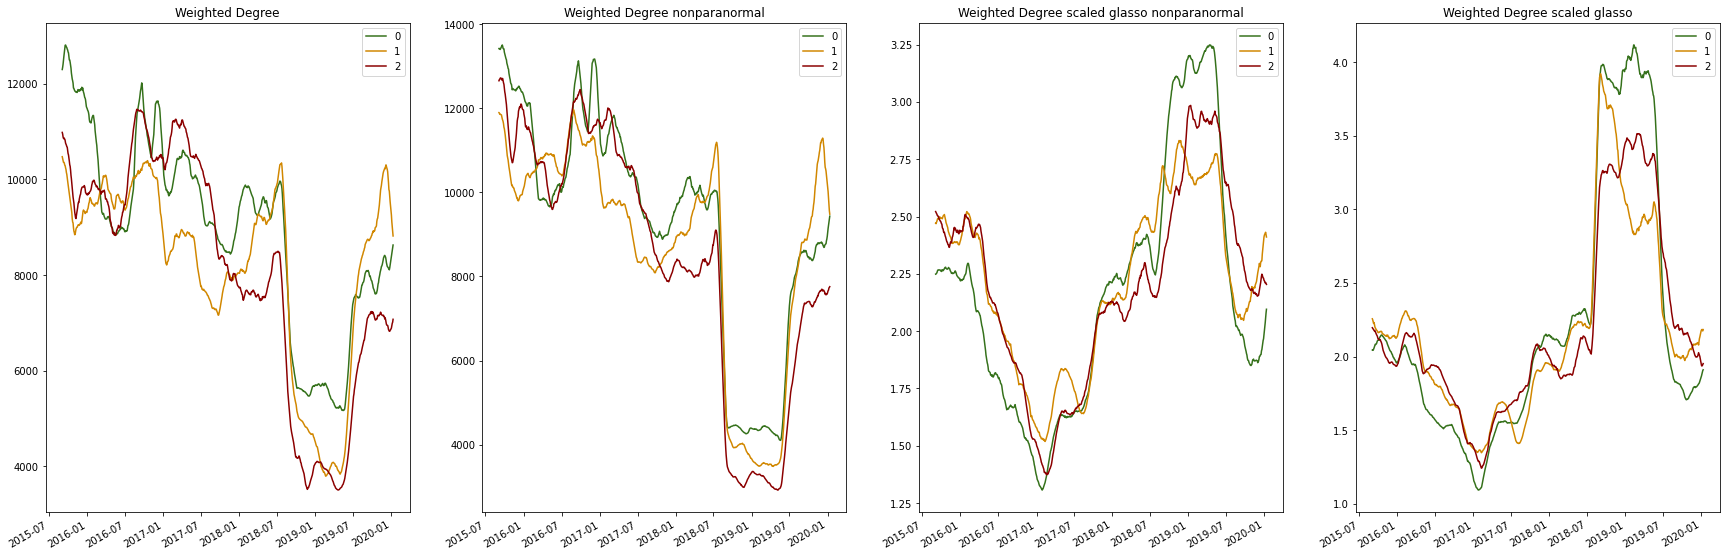

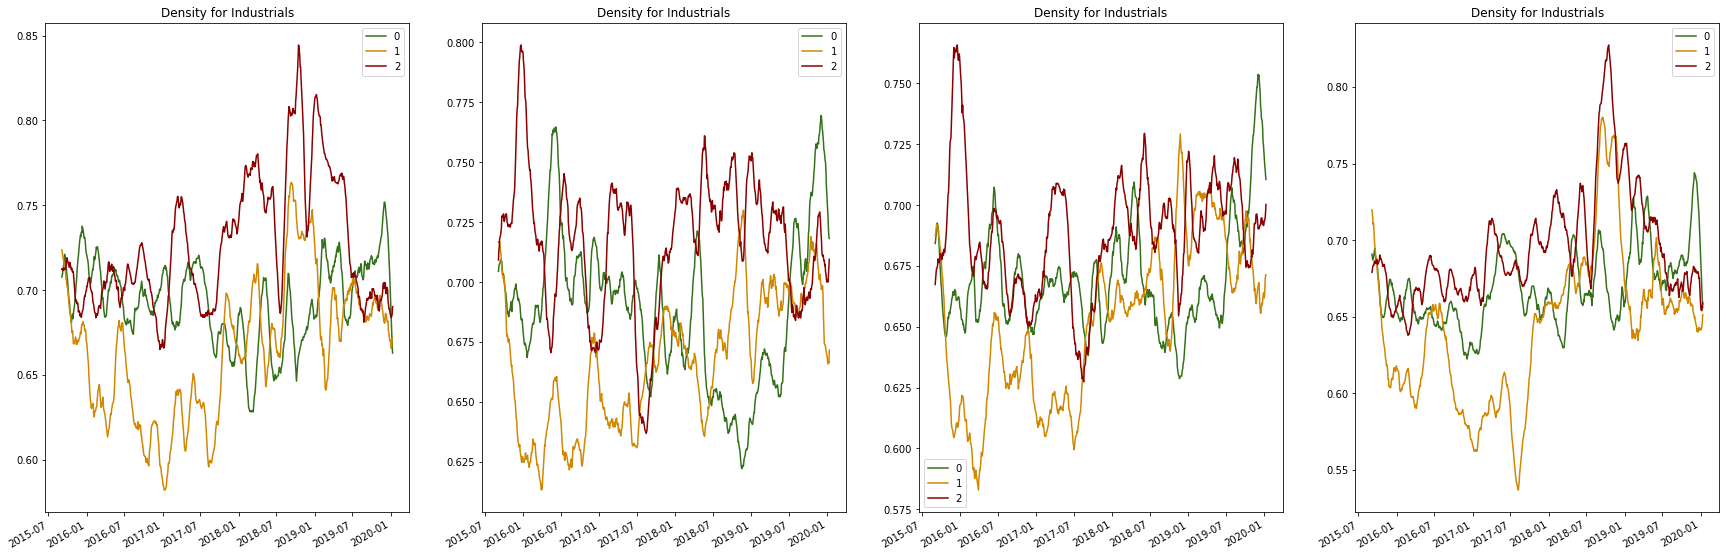

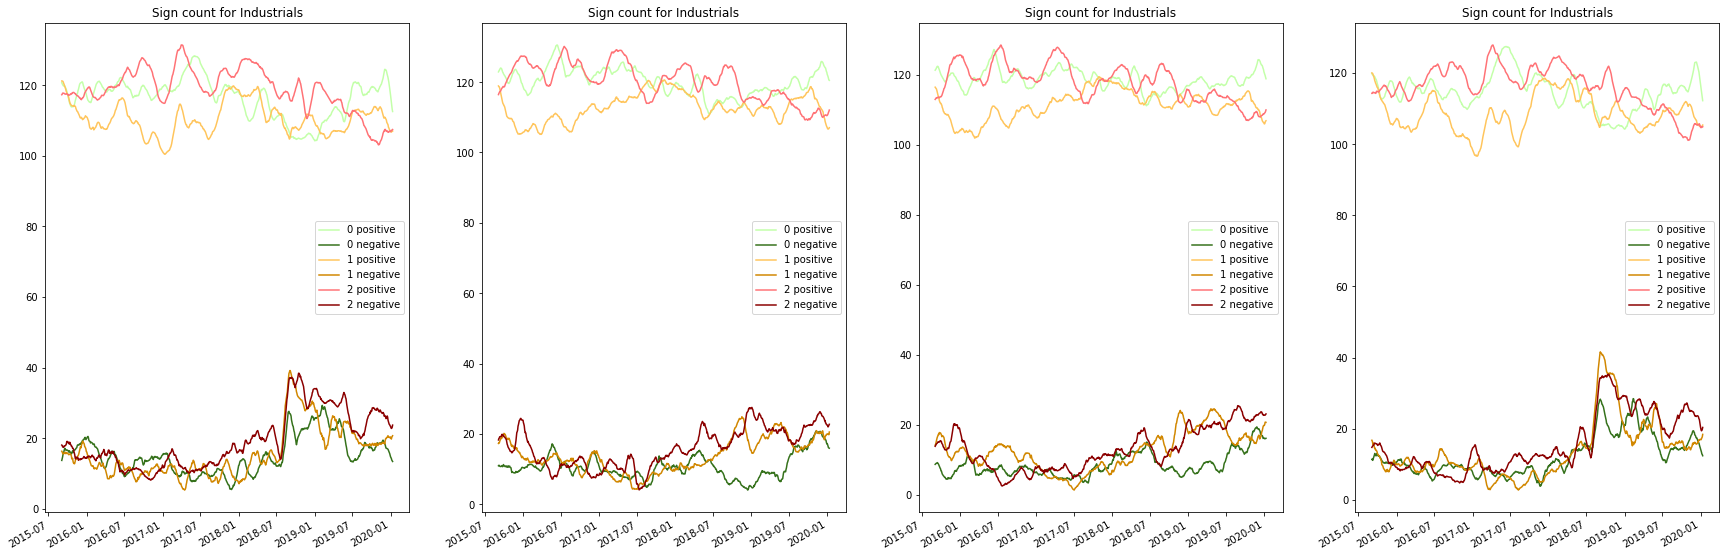

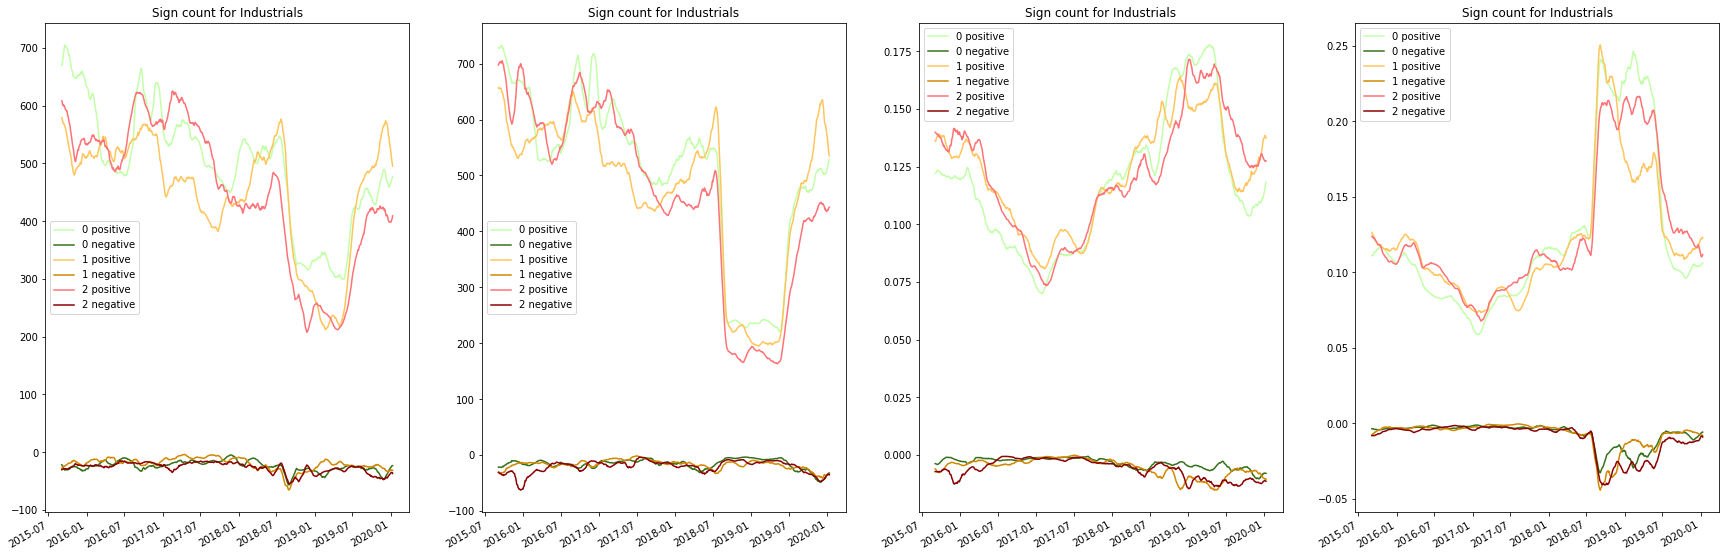

In [15]:
rw = 20
for idx in range(len(scale_F_nonparanormal)):
    fig, ax = plt.subplots(1,4, figsize = (30,10))
    plot_avg_degree(scale_F_none[idx], ax = ax[0], title = f'Binary Degree', rolling_window= rw)
    plot_avg_degree(scale_F_nonparanormal[idx], ax = ax[1], title = f'Binary Degree nonparanormal', rolling_window= rw)
    plot_avg_degree(scale_T_nonparanormal[idx], ax = ax[2], title = f'Binary Degree scaled glasso nonparanormal', rolling_window= rw)
    plot_avg_degree(scale_T_none[idx], ax = ax[3], title = f'Binary Degree scaled glasso', rolling_window= rw)
    fig.autofmt_xdate()

    fig, ax = plt.subplots(1,4, figsize = (30,10))
    plot_avg_degree(scale_F_none[idx], weight = 'weight', ax = ax[0], title = f'Weighted Degree', rolling_window= rw)
    plot_avg_degree(scale_F_nonparanormal[idx], weight = 'weight', ax = ax[1], title = f'Weighted Degree nonparanormal', rolling_window= rw)
    plot_avg_degree(scale_T_nonparanormal[idx], weight = 'weight', ax = ax[2], title = f'Weighted Degree scaled glasso nonparanormal', rolling_window= rw)
    plot_avg_degree(scale_T_none[idx], weight = 'weight', ax = ax[3], title = f'Weighted Degree scaled glasso', rolling_window= rw)
    fig.autofmt_xdate()

    fig, ax = plt.subplots(1,4, figsize = (30,10))
    plot_G_density(scale_F_none[idx],  ax = ax[0],  rolling_window= rw)
    plot_G_density(scale_F_nonparanormal[idx], ax = ax[1], rolling_window= rw)
    plot_G_density(scale_T_nonparanormal[idx],  ax = ax[2], rolling_window= rw)
    plot_G_density(scale_T_none[idx],  ax = ax[3], rolling_window= rw)
    fig.autofmt_xdate()

    fig, ax = plt.subplots(1,4, figsize = (30,10))
    plot_G_signs(scale_F_none[idx],  ax = ax[0],  rolling_window= rw)
    plot_G_signs(scale_F_nonparanormal[idx], ax = ax[1], rolling_window= rw)
    plot_G_signs(scale_T_nonparanormal[idx],  ax = ax[2], rolling_window= rw)
    plot_G_signs(scale_T_none[idx],  ax = ax[3], rolling_window= rw)
    fig.autofmt_xdate()

    fig, ax = plt.subplots(1,4, figsize = (30,10))
    plot_weight_signs(scale_F_none[idx],  ax = ax[0],  rolling_window= rw)
    plot_weight_signs(scale_F_nonparanormal[idx], ax = ax[1], rolling_window= rw)
    plot_weight_signs(scale_T_nonparanormal[idx],  ax = ax[2], rolling_window= rw)
    plot_weight_signs(scale_T_none[idx],  ax = ax[3], rolling_window= rw)
    fig.autofmt_xdate()


Compare best graph vs almost best

ESG dispersion

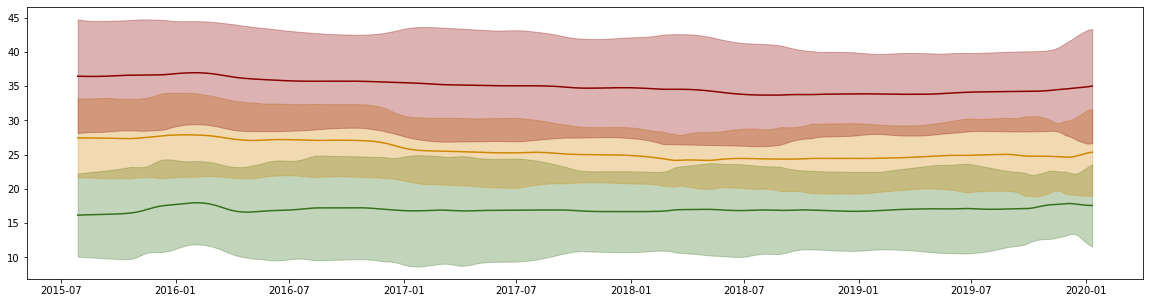

In [42]:
fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(scale_F_nonparanormal[0]['dates'], scale_F_nonparanormal[0]['esg_mean'][0], color = color_dark[0])
ax.fill_between(
    scale_F_nonparanormal[0]['dates'].ravel(),
    np.array(scale_F_nonparanormal[0]['esg_mean'][0]) - 1.96 * np.array(scale_F_nonparanormal[0]['esg_std'][0]),
    np.array(scale_F_nonparanormal[0]['esg_mean'][0]) + 1.96 * np.array(scale_F_nonparanormal[0]['esg_std'][0]),
    alpha=0.3,
    color = color_dark[0]
)

ax.plot(scale_F_nonparanormal[0]['dates'], scale_F_nonparanormal[0]['esg_mean'][1], color = color_dark[1])
ax.fill_between(
    scale_F_nonparanormal[0]['dates'].ravel(),
    np.array(scale_F_nonparanormal[0]['esg_mean'][1]) - 1.96 * np.array(scale_F_nonparanormal[0]['esg_std'][1]),
    np.array(scale_F_nonparanormal[0]['esg_mean'][1]) + 1.96 * np.array(scale_F_nonparanormal[0]['esg_std'][1]),
    alpha=0.3,
    color = color_dark[1]
)

ax.plot(scale_F_nonparanormal[0]['dates'], scale_F_nonparanormal[0]['esg_mean'][2], color = color_dark[2])
ax.fill_between(
    scale_F_nonparanormal[0]['dates'].ravel(),
    np.array(scale_F_nonparanormal[0]['esg_mean'][2]) - 1.96 * np.array(scale_F_nonparanormal[0]['esg_std'][2]),
    np.array(scale_F_nonparanormal[0]['esg_mean'][2]) + 1.96 * np.array(scale_F_nonparanormal[0]['esg_std'][2]),
    alpha=0.3,
    color = color_dark[2]
)

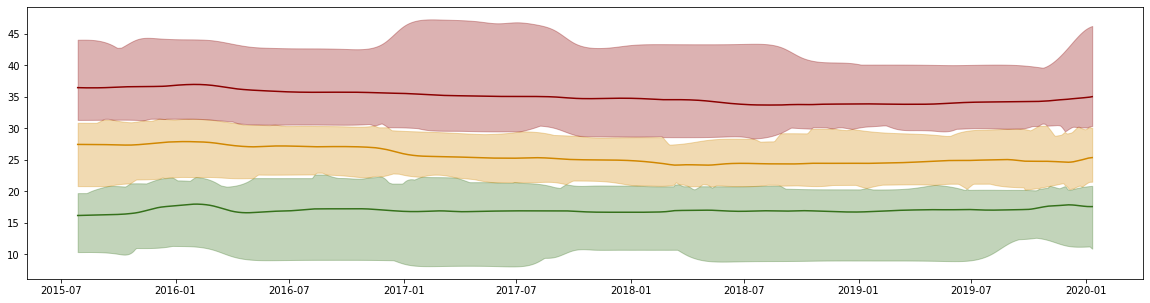

In [128]:
fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(scale_F_nonparanormal[0]['dates'], scale_F_nonparanormal[0]['esg_mean'][0], color = color_dark[0])
ax.fill_between(
    scale_F_nonparanormal[0]['dates'].ravel(),
    np.array(scale_T_nonparanormal[0]['esg_max'][0]) ,
    np.array(scale_T_nonparanormal[0]['esg_min'][0]),
    alpha=0.3,
    color = color_dark[0]
)

ax.plot(scale_F_nonparanormal[0]['dates'], scale_F_nonparanormal[0]['esg_mean'][1], color = color_dark[1])
ax.fill_between(
    scale_F_nonparanormal[0]['dates'].ravel(),
    np.array(scale_T_nonparanormal[0]['esg_max'][1]) ,
    np.array(scale_T_nonparanormal[0]['esg_min'][1]),
    alpha=0.3,
    color = color_dark[1]
)

ax.plot(scale_F_nonparanormal[0]['dates'], scale_F_nonparanormal[0]['esg_mean'][2], color = color_dark[2])
ax.fill_between(
    scale_F_nonparanormal[0]['dates'].ravel(),
    np.array(scale_T_nonparanormal[0]['esg_max'][2]) ,
    np.array(scale_T_nonparanormal[0]['esg_min'][2]),
    alpha=0.3,
    color = color_dark[2]
)

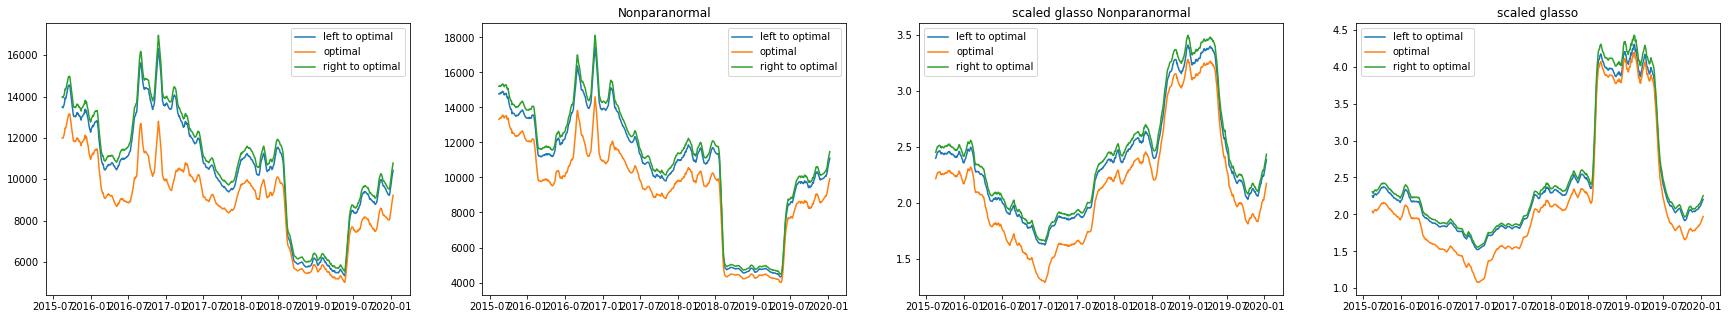

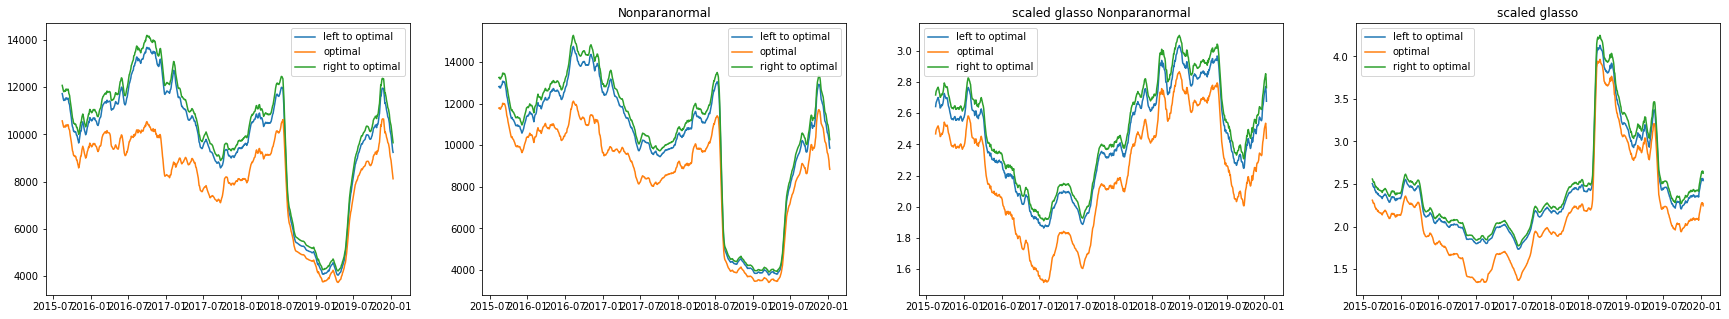

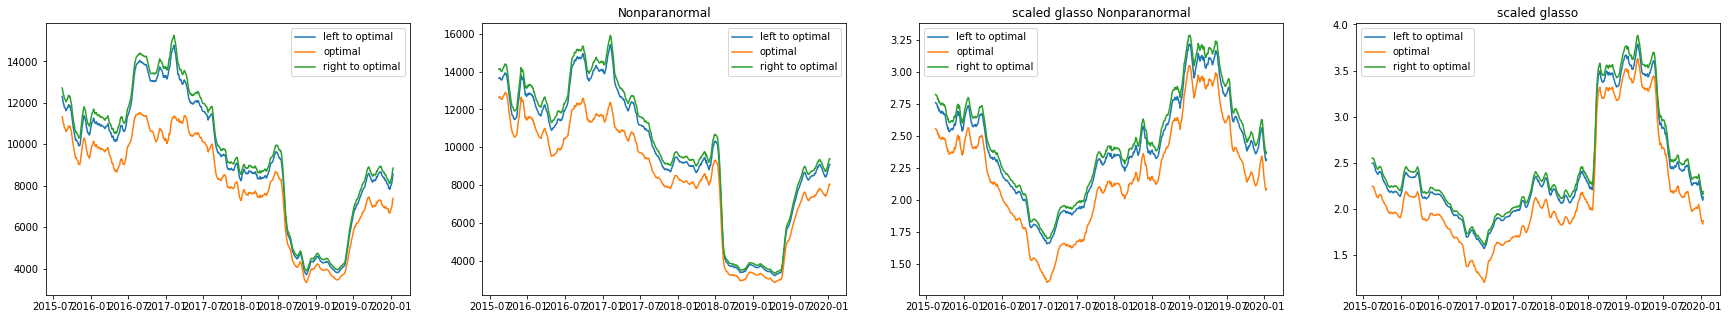

In [141]:
def compare_best_next(df, ax, group, title = '', weight = 'weight'):
    i = group
    # minus one
    avg_degree_dict = [avg_degree(nx.from_numpy_array(df[0]['prec_dict_minus_1'][i][j]), weight) for j in range(len(df[0]['prec_dict_minus_1'][i]))]
    ax.plot(df[0]['dates'], pd.DataFrame(avg_degree_dict).rolling(10).mean().iloc[:,0], label = 'left to optimal')
    # best
    avg_degree_dict = [avg_degree(df[0]['graph_dict'][i][j], weight) for j in range(len(df[0]['prec_dict_minus_1'][i]))]
    ax.plot(df[0]['dates'], pd.DataFrame(avg_degree_dict).rolling(10).mean().iloc[:,0], label = 'optimal')
    # plus one
    avg_degree_dict = [avg_degree(nx.from_numpy_array(g), weight) if type(g) is not float else np.nan for j, g in enumerate(df[0]['prec_dict_plus_1'][i])]
    ax.plot(df[0]['dates'], pd.DataFrame(avg_degree_dict).rolling(10).mean().iloc[:,0], label = 'right to optimal')
    ax.set_title(title)
    ax.legend()

weight = 'weight'
fig, ax = plt.subplots(1,4, figsize = (30,5))
compare_best_next(scale_F_none, ax = ax[0], group=0, weight = weight)
compare_best_next(scale_F_nonparanormal, ax = ax[1], group=0, title = f'Nonparanormal', weight = weight)
compare_best_next(scale_T_nonparanormal, ax = ax[2], group=0,  title = f'scaled glasso Nonparanormal', weight = weight)
compare_best_next(scale_T_none, ax = ax[3], group=0,  title = f'scaled glasso', weight = weight)
fig.autofmt_xdate()
fig, ax = plt.subplots(1,4, figsize = (30,5))
compare_best_next(scale_F_none, ax = ax[0], group=1, weight = weight)
compare_best_next(scale_F_nonparanormal, ax = ax[1], group=1, title = f'Nonparanormal', weight = weight)
compare_best_next(scale_T_nonparanormal, ax = ax[2], group=1,  title = f'scaled glasso Nonparanormal', weight = weight)
compare_best_next(scale_T_none, ax = ax[3], group=1,  title = f'scaled glasso', weight = weight)
fig.autofmt_xdate()
fig, ax = plt.subplots(1,4, figsize = (30,5))
compare_best_next(scale_F_none, ax = ax[0], group=2, weight = weight)
compare_best_next(scale_F_nonparanormal, ax = ax[1], group=2, title = f'Nonparanormal', weight = weight)
compare_best_next(scale_T_nonparanormal, ax = ax[2], group=2,  title = f'scaled glasso Nonparanormal', weight = weight)
compare_best_next(scale_T_none, ax = ax[3], group=2,  title = f'scaled glasso', weight = weight)
fig.autofmt_xdate()




Some differences

In [17]:
ax[i].get_xticklabels()

[Text(16617.0, 0, '2015-07'),
 Text(16801.0, 0, '2016-01'),
 Text(16983.0, 0, '2016-07'),
 Text(17167.0, 0, '2017-01'),
 Text(17348.0, 0, '2017-07'),
 Text(17532.0, 0, '2018-01'),
 Text(17713.0, 0, '2018-07'),
 Text(17897.0, 0, '2019-01'),
 Text(18078.0, 0, '2019-07'),
 Text(18262.0, 0, '2020-01')]

portfolio

In [22]:
scale_F_none[0]['portfolios_info'][port_type]['cov_div'][0][:5]

[1.1960416875059428,
 1.216638864972919,
 1.2169017297051714,
 1.208069423249413,
 1.2115125011736412]

In [23]:
scale_F_nonparanormal[0]['portfolios_info'][port_type]['cov_div'][0][:5]

[1.213674862303761,
 1.229920586608812,
 1.2276249803835786,
 1.2250088142298423,
 1.2216889184363229]

In [24]:
scale_T_nonparanormal[0]['portfolios_info'][port_type]['cov_div'][0][:5]

[1.202061098561781,
 1.2201471727546387,
 1.2175972177359706,
 1.2166012321450124,
 1.2103713112521832]

In [25]:
scale_T_none[0]['portfolios_info'][port_type]['cov_div'][0][:5]

[1.1768925558806804,
 1.1942956158502291,
 1.1958404521227373,
 1.1945010868043529,
 1.1941604033265476]

In [31]:
np.array(color_dark)[[0,2]]

array(['#35711b', '#8B0000'], dtype='<U7')

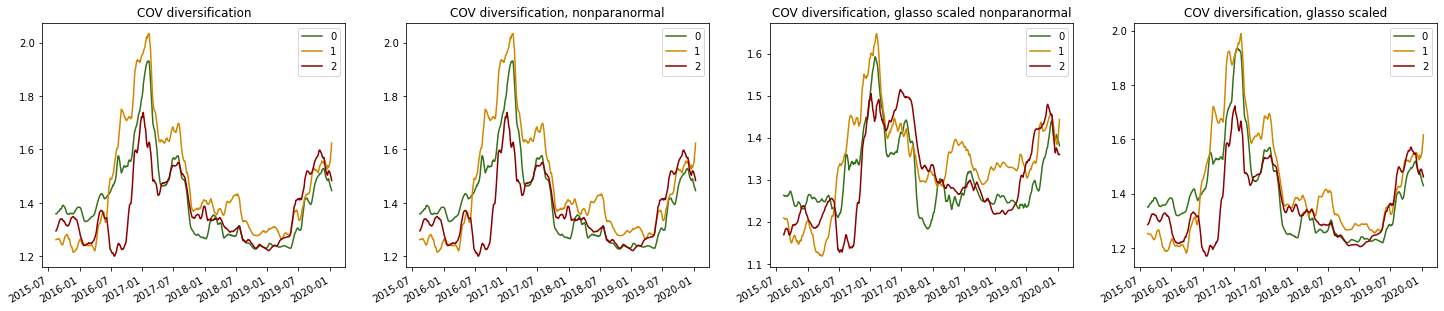

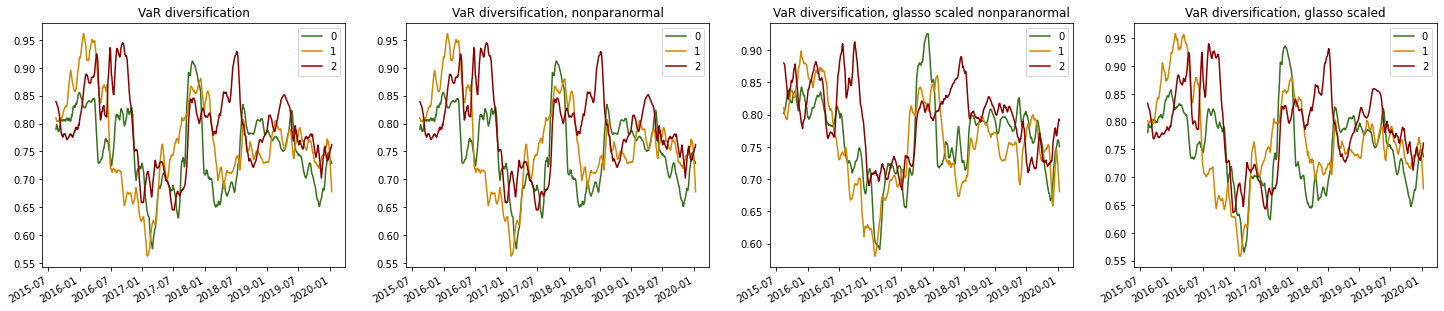

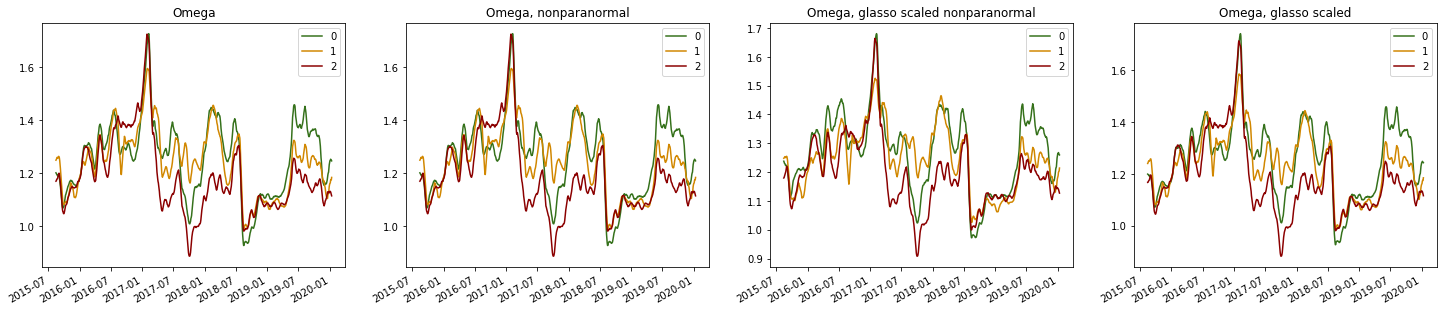

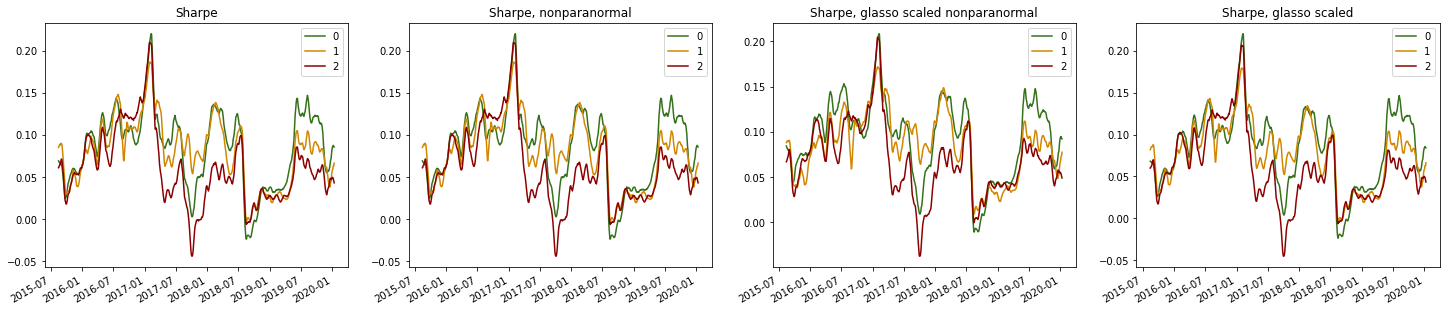

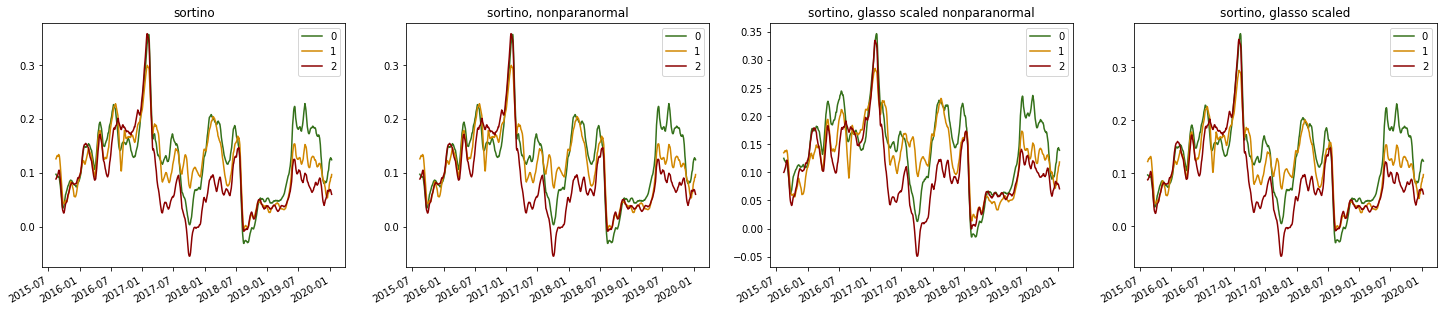

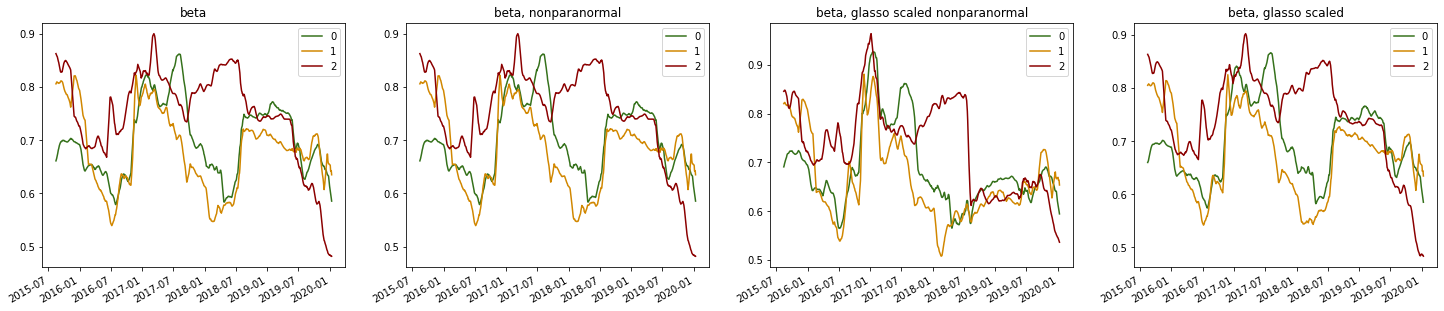

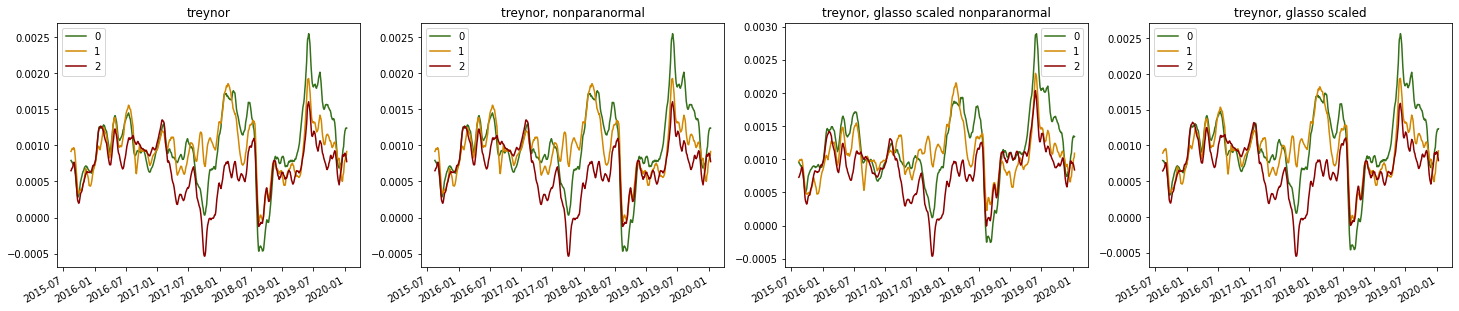

In [119]:
sector = 'Industrials'
port_type = 'gmv'
fig, ax = plt.subplots(1,4, figsize = (25,5))
rmean = 10
pd.DataFrame(scale_F_none[0]['portfolios_info'][port_type]['cov_div'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[0], color = color_dark, title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal[0]['portfolios_info'][port_type]['cov_div'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[1], color = color_dark, title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_T_nonparanormal[0]['portfolios_info'][port_type]['cov_div'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[2], color = color_dark, title = f'COV diversification, glasso scaled nonparanormal')
pd.DataFrame(scale_T_none[0]['portfolios_info'][port_type]['cov_div'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[3], color = color_dark, title = f'COV diversification, glasso scaled')
fig.autofmt_xdate()

fig, ax = plt.subplots(1,4, figsize = (25,5))
pd.DataFrame(scale_F_none[0]['portfolios_info'][port_type]['var_div'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[0], color = color_dark, title = f'VaR diversification')
pd.DataFrame(scale_F_nonparanormal[0]['portfolios_info'][port_type]['var_div'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[1], color = color_dark, title = f'VaR diversification, nonparanormal')
pd.DataFrame(scale_T_nonparanormal[0]['portfolios_info'][port_type]['var_div'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[2], color = color_dark, title = f'VaR diversification, glasso scaled nonparanormal')
pd.DataFrame(scale_T_none[0]['portfolios_info'][port_type]['var_div'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[3], color = color_dark, title = f'VaR diversification, glasso scaled')
fig.autofmt_xdate()

fig, ax = plt.subplots(1,4, figsize = (25,5))
pd.DataFrame(scale_F_none[0]['portfolios_info'][port_type]['omega'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[0], color = color_dark, title = f'Omega')
pd.DataFrame(scale_F_nonparanormal[0]['portfolios_info'][port_type]['omega'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[1], color = color_dark, title = f'Omega, nonparanormal')
pd.DataFrame(scale_T_nonparanormal[0]['portfolios_info'][port_type]['omega'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[2], color = color_dark, title = f'Omega, glasso scaled nonparanormal')
pd.DataFrame(scale_T_none[0]['portfolios_info'][port_type]['omega'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[3], color = color_dark, title = f'Omega, glasso scaled')
fig.autofmt_xdate()

fig, ax = plt.subplots(1,4, figsize = (25,5))
pd.DataFrame(scale_F_none[0]['portfolios_info'][port_type]['sharpe'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[0], color = color_dark, title = f'Sharpe')
pd.DataFrame(scale_F_nonparanormal[0]['portfolios_info'][port_type]['sharpe'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[1], color = color_dark, title = f'Sharpe, nonparanormal')
pd.DataFrame(scale_T_nonparanormal[0]['portfolios_info'][port_type]['sharpe'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[2], color = color_dark, title = f'Sharpe, glasso scaled nonparanormal')
pd.DataFrame(scale_T_none[0]['portfolios_info'][port_type]['sharpe'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[3], color = color_dark, title = f'Sharpe, glasso scaled')
fig.autofmt_xdate()

fig, ax = plt.subplots(1,4, figsize = (25,5))
pd.DataFrame(scale_F_none[0]['portfolios_info'][port_type]['sortino'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[0], color = color_dark, title = f'sortino')
pd.DataFrame(scale_F_nonparanormal[0]['portfolios_info'][port_type]['sortino'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[1], color = color_dark, title = f'sortino, nonparanormal')
pd.DataFrame(scale_T_nonparanormal[0]['portfolios_info'][port_type]['sortino'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[2], color = color_dark, title = f'sortino, glasso scaled nonparanormal')
pd.DataFrame(scale_T_none[0]['portfolios_info'][port_type]['sortino'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[3], color = color_dark, title = f'sortino, glasso scaled')
fig.autofmt_xdate()

fig, ax = plt.subplots(1,4, figsize = (25,5))
pd.DataFrame(scale_F_none[0]['portfolios_info'][port_type]['beta'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[0], color = color_dark, title = f'beta')
pd.DataFrame(scale_F_nonparanormal[0]['portfolios_info'][port_type]['beta'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[1], color = color_dark, title = f'beta, nonparanormal')
pd.DataFrame(scale_T_nonparanormal[0]['portfolios_info'][port_type]['beta'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[2], color = color_dark, title = f'beta, glasso scaled nonparanormal')
pd.DataFrame(scale_T_none[0]['portfolios_info'][port_type]['beta'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[3], color = color_dark, title = f'beta, glasso scaled')
fig.autofmt_xdate()

fig, ax = plt.subplots(1,4, figsize = (25,5))
pd.DataFrame(scale_F_none[0]['portfolios_info'][port_type]['treynor'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[0], color = color_dark, title = f'treynor')
pd.DataFrame(scale_F_nonparanormal[0]['portfolios_info'][port_type]['treynor'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[1], color = color_dark, title = f'treynor, nonparanormal')
pd.DataFrame(scale_T_nonparanormal[0]['portfolios_info'][port_type]['treynor'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[2], color = color_dark, title = f'treynor, glasso scaled nonparanormal')
pd.DataFrame(scale_T_none[0]['portfolios_info'][port_type]['treynor'], index = scale_F_none[idx]['dates']).rolling(rmean).mean().plot(ax = ax[3], color = color_dark, title = f'treynor, glasso scaled')
fig.autofmt_xdate()



Seem to be very similar

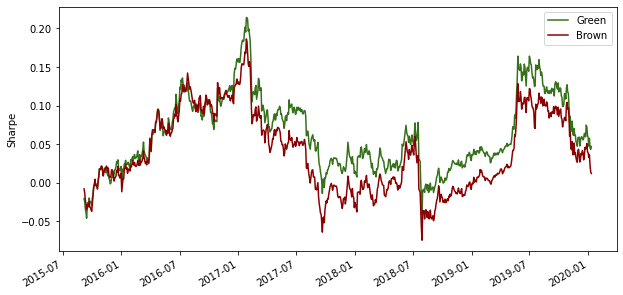

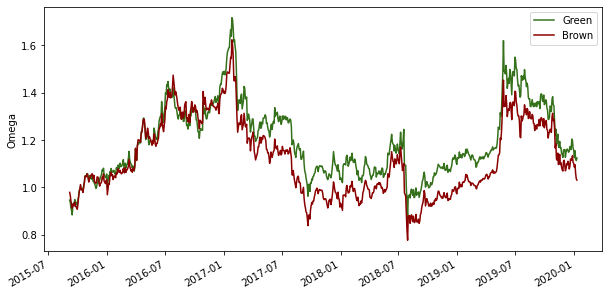

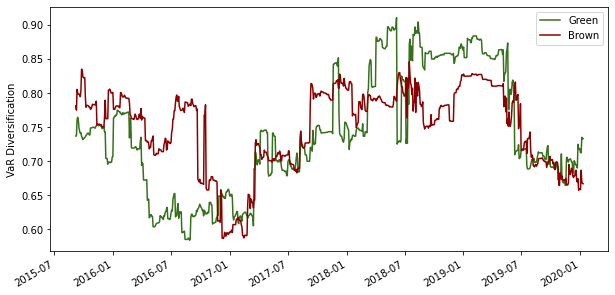

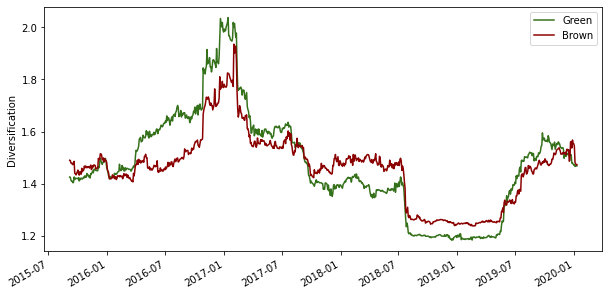

In [115]:
port_type = 'uniform'

fig, ax = plt.subplots(1,1, figsize = (10,5))
rmean = 1
pd.DataFrame(scale_T_none[0]['portfolios_info'][port_type]['sharpe'], index = scale_F_none[idx]['dates']).iloc[20:,[0,2]].rolling(rmean).mean().plot(ax = ax, color = np.array(color_dark)[[0,2]])
ax.set_ylabel('Sharpe')
ax.legend(["Green", "Brown"])
fig.autofmt_xdate()

fig, ax = plt.subplots(1,1, figsize = (10,5))
pd.DataFrame(scale_T_none[0]['portfolios_info'][port_type]['omega'], index = scale_F_none[idx]['dates']).iloc[20:,[0,2]].rolling(rmean).mean().plot(ax = ax, color = np.array(color_dark)[[0,2]])
ax.set_ylabel('Omega')
ax.legend(["Green", "Brown"])
fig.autofmt_xdate()

fig, ax = plt.subplots(1,1, figsize = (10,5))
pd.DataFrame(scale_T_none[0]['portfolios_info'][port_type]['var_div'], index = scale_F_none[idx]['dates']).iloc[20:,[0,2]].rolling(rmean).mean().plot(ax = ax, color = np.array(color_dark)[[0,2]])
ax.set_ylabel('VaR Diversification')
ax.legend(["Green", "Brown"])
fig.autofmt_xdate()

fig, ax = plt.subplots(1,1, figsize = (10,5))
pd.DataFrame(scale_T_none[0]['portfolios_info'][port_type]['cov_div'], index = scale_F_none[idx]['dates']).iloc[20:,[0,2]].rolling(rmean).mean().plot(ax = ax, color = np.array(color_dark)[[0,2]])
ax.set_ylabel('Diversification')
ax.legend(["Green", "Brown"])
fig.autofmt_xdate()

Plot per regularization

In [131]:
def plot_regularization(data_dict, portfolio_type, group, port_metric, ax, title):
    sector = data_dict[idx]['sector']
    for regularization in data_dict[0]['portfolios_reg_info'][portfolio_type].keys():
        ddd = data_dict[0]['portfolios_reg_info'][portfolio_type][regularization]
        df = pd.DataFrame(ddd[port_metric][group], index = data_dict[idx]['dates']).rolling(5).mean()
        ax.plot(df.index, df.iloc[:,0], label = regularization )
        
    ddd_opt = data_dict[0]['portfolios_info'][portfolio_type]
    df_opt = pd.DataFrame(ddd_opt[port_metric][group], index = data_dict[idx]['dates']).rolling(5).mean()
    ax.plot(df.index, df_opt.iloc[:,0], label = 'Optimal', color = 'black', alpha = 0.8)
    ax.set_title(f'{title} {port_metric}')

    ax.legend()

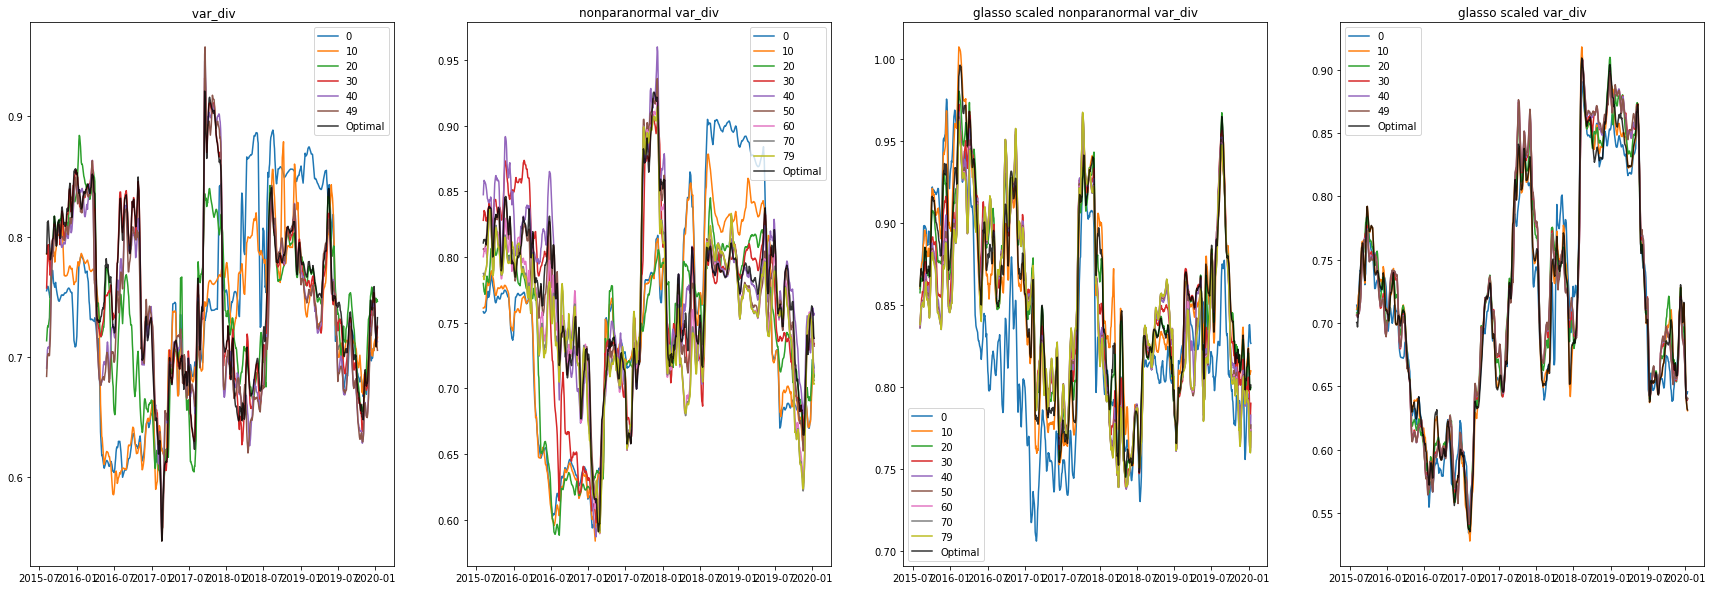

In [133]:
portfolio_type = 'gmv'
group = 0
metric = 'var_div'

fig, ax = plt.subplots(1,4, figsize = (30,10))
plot_regularization(scale_F_none, portfolio_type, group, metric, ax = ax[0], title = '')
plot_regularization(scale_F_nonparanormal, portfolio_type, group, metric, ax = ax[1], title = 'nonparanormal')
plot_regularization(scale_T_nonparanormal, portfolio_type, group, metric, ax = ax[2], title = 'glasso scaled nonparanormal')
plot_regularization(scale_T_none, portfolio_type, group, metric, ax = ax[3], title = 'glasso scaled')






# ALL

Load graphs

# 

We have to scale the data, otherwise lgrmf will put equal weights to all nodes giving a complete graph

In [59]:
with open(f'../data/Graphs/case_study_1_d_1_winlen_300_gest_huge_glasso_ebic_scale_None.pkl', 'rb') as f:
    data_dict = pickle.load(f)
data_dict[0].keys()

dict_keys(['dates', 'graph_dict', 'sector', 'cov_dict', 'GMV_portfolio_dict', 'max_sharpe_portfolio_dict', 'return_dict', 'window_size', 'stock_partition', 'gmv_div_dict', 'gmv_var_div_dict', 'sharpe_div_dict', 'sharpe_var_div_dict', 'uni_div_dict', 'uni_var_div_dict', 'cov_dict2', 'GMV_portfolio_dict2', 'max_sharpe_portfolio_dict2', 'return_dict2', 'gmv_div_dict2', 'gmv_var_div_dict2', 'sharpe_div_dict2', 'sharpe_var_div_dict2', 'uni_div_dict2', 'uni_var_div_dict2'])

Plot graph statistics

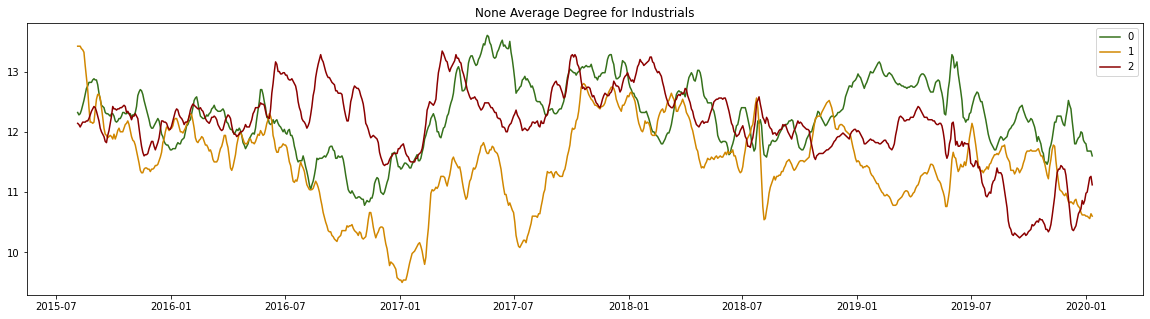

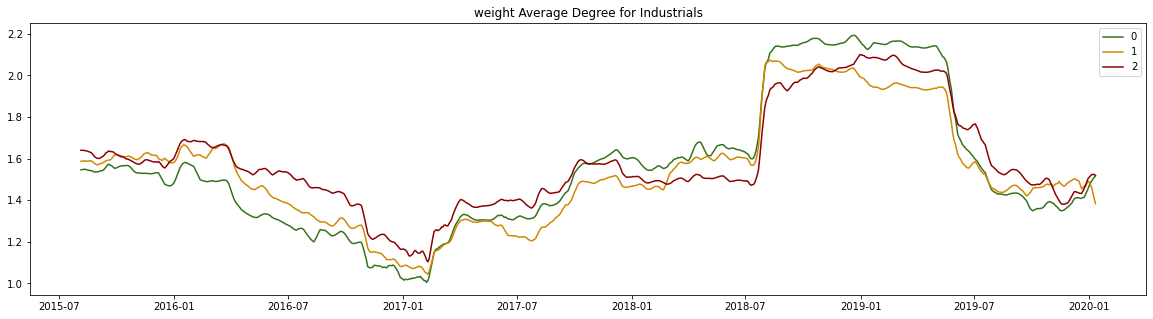

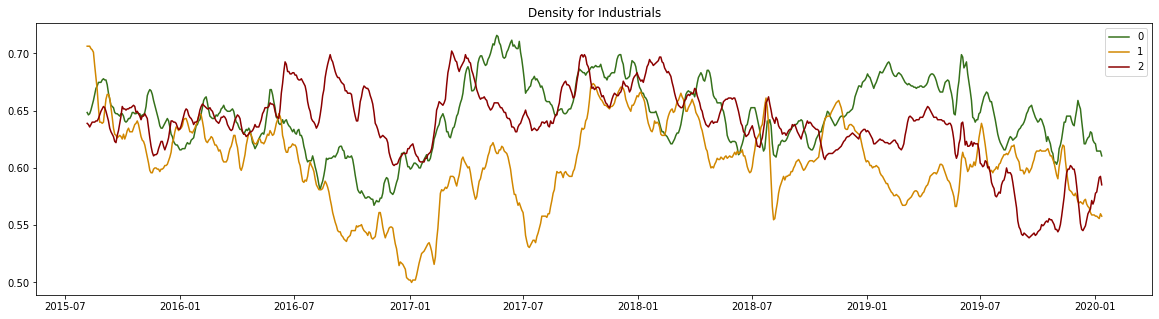

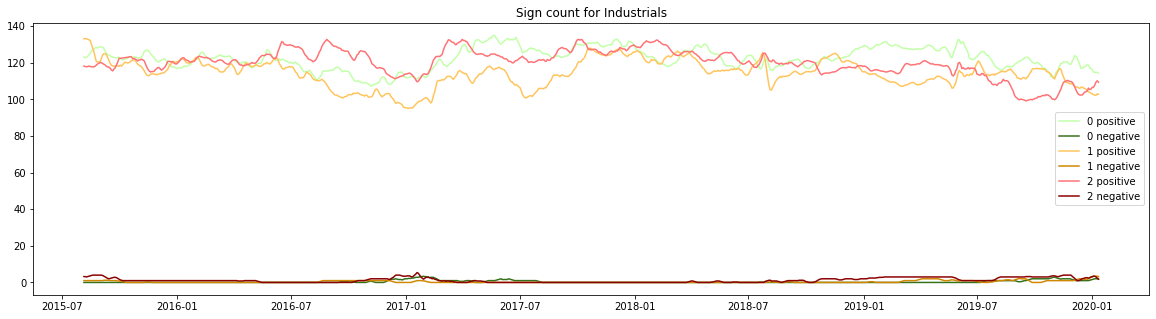

In [60]:

for idx in range(len(data_dict)):
    fig, ax = plt.subplots(1,1, figsize = (20,5))
    plot_avg_degree(data_dict[idx], ax = ax)
    fig, ax = plt.subplots(1,1, figsize = (20,5))
    plot_avg_degree(data_dict[idx], weight = 'weight', ax = ax)
    fig, ax = plt.subplots(1,1, figsize = (20,5))
    plot_G_density(data_dict[idx], ax = ax)
    fig, ax = plt.subplots(1,1, figsize = (20,5))
    plot_G_signs(data_dict[idx], ax = ax)
    

In [ ]:
data_dict['graph_dict']

Plot example graphs

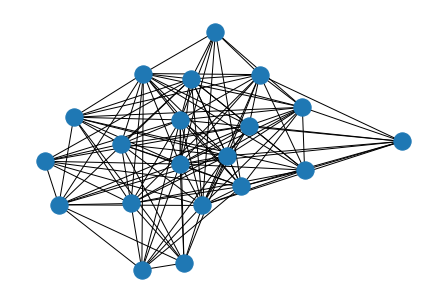

In [220]:
nx.draw(data_dict[0]['graph_dict'][0][300])

Look at if the splits are uniform

In [243]:
data_dict[idx]['sector']

'Industrials'

In [195]:
data_dict[idx]['stock_partition'][0][0]

array(['APD', 'KMI', 'IFF', 'NEM', 'WMB', 'CMS', 'ES', 'SLB', 'EMN',
       'OKE', 'LYB', 'XEL', 'ECL', 'EXC', 'COP', 'EIX', 'PEG', 'HES',
       'HAL', 'MPC'], dtype=object)

<AxesSubplot:>

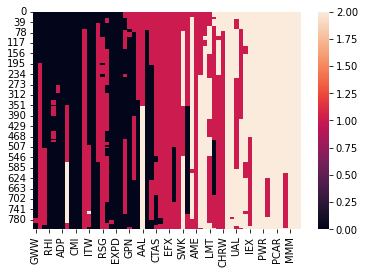

In [67]:
unique_stocks =np.concatenate((data_dict[idx]['stock_partition'][0][0],data_dict[idx]['stock_partition'][1][0],data_dict[idx]['stock_partition'][2][0]))
n = len(data_dict[idx]['stock_partition'][0])
p = len(unique_stocks)
unique_stocks = pd.DataFrame(np.zeros((n,p)), columns= unique_stocks)

for col in unique_stocks.columns:
    for i in range(len(data_dict[idx]['stock_partition'][0])):
        for j in range(3):
            if col in data_dict[idx]['stock_partition'][j][i]:
                unique_stocks[col].iloc[i] = j
                continue

sns.heatmap(unique_stocks)

Count number proportion of sector in each ckass

In [222]:
n = len(data_dict[idx]['stock_partition'][0])
p = 11
sector_count = pd.DataFrame(np.zeros((n*3,12)), columns= np.concatenate((list(sector_classification.keys()), ["group"])))

for k in sector_classification.keys():
    for i in range(len(data_dict[idx]['stock_partition'][0])):
        for j in range(3):
            cnt = np.sum(np.isin(data_dict[idx]['stock_partition'][j][i], sector_classification[k]))
            sector_count[k].iloc[(i*3)+j] = cnt
            sector_count['group'].iloc[(i*3)+j] = j


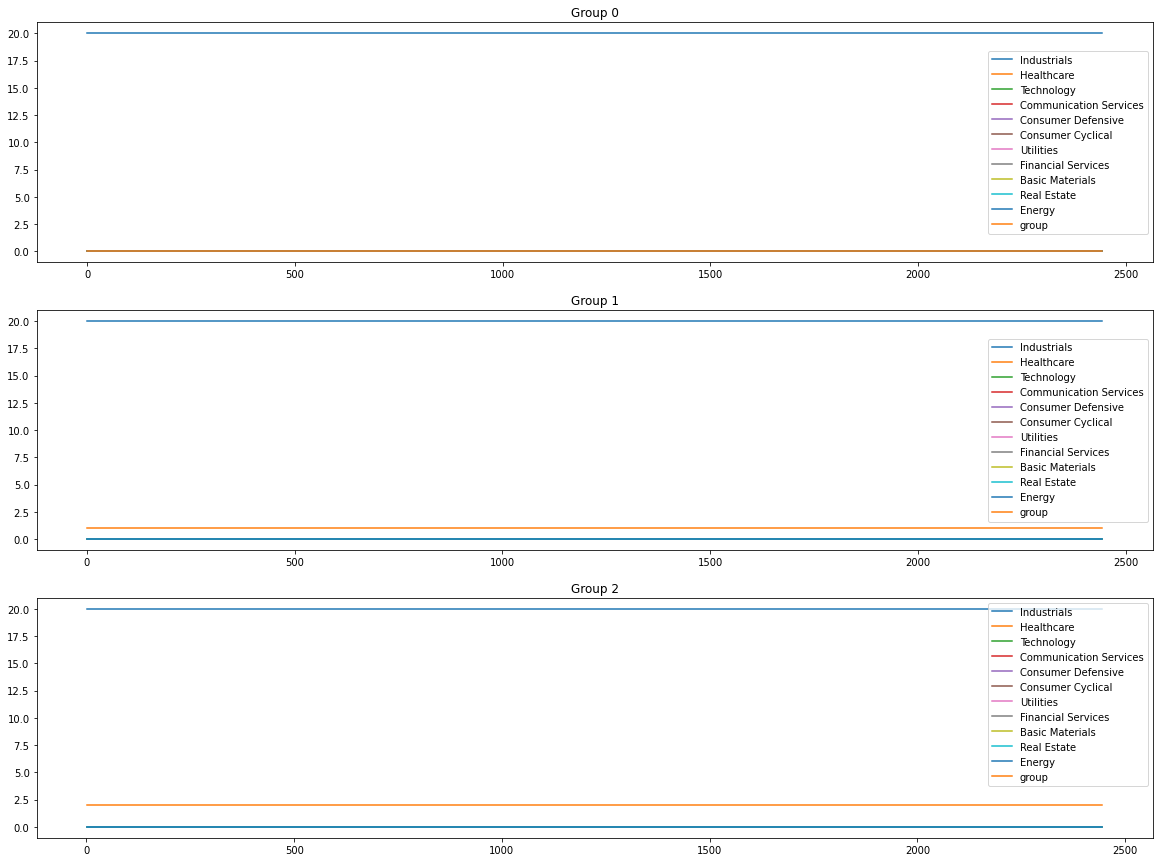

In [224]:
fig, ax = plt.subplots(3,1, figsize = (20,15))
for j in range(3):
    # [['Utilities', 'Energy', 'Basic Materials']]
    sector_count.loc[sector_count['group'] == j].plot(ax = ax[j], title = f'Group {j}')



Plot weights

(-10.0, 10.0)

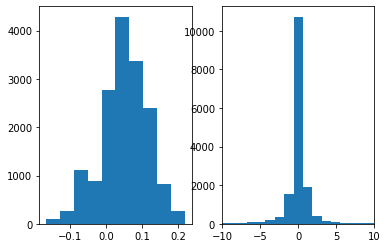

In [247]:
fig, ax = plt.subplots(1,2)
_ = ax[0].hist(np.hstack(data_dict[idx]['GMV_portfolio_dict'][0]))
_ = ax[1].hist(np.hstack(data_dict[idx]['max_sharpe_portfolio_dict'][0]), bins = 1000)
ax[1].set_xlim([-10,10])

Plot diversification

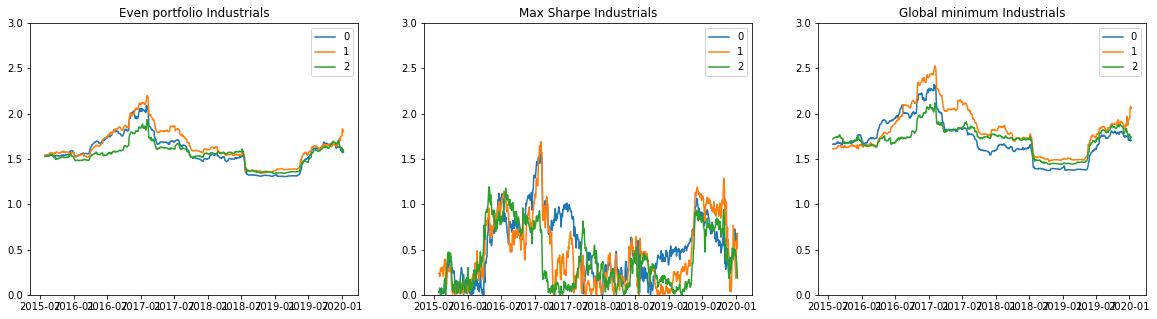

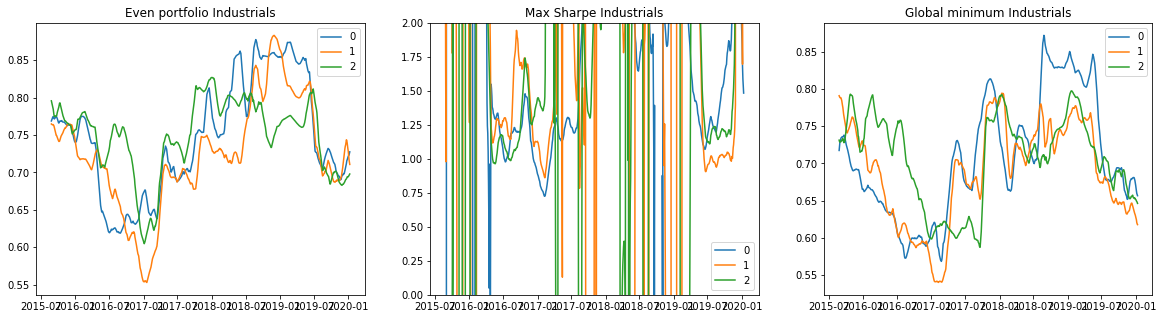

In [248]:
for idx in range(len(data_dict)):
    sector = data_dict[idx]['sector']


    fig, ax = plt.subplots(1,3, figsize = (20,5))
    pd.DataFrame(data_dict[idx]['uni_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[0], title = f'Even portfolio {sector}', ylim = [0,3])
    pd.DataFrame(data_dict[idx]['sharpe_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[1], title = f'Max Sharpe {sector}', ylim = [0,3])
    pd.DataFrame(data_dict[idx]['gmv_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[2], title = f'Global minimum {sector}', ylim = [0,3])

    #fig, ax = plt.subplots(1,3, figsize = (20,5))
    #pd.DataFrame(data_dict[idx]['uni_var_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[0], title = f'Even portfolio {sector}' )
    #pd.DataFrame(data_dict[idx]['sharpe_var_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[1], title = f'Max Sharpe {sector}')
    #pd.DataFrame(data_dict[idx]['gmv_var_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[2], title = f'Global minimum {sector}')

    fig, ax = plt.subplots(1,3, figsize = (20,5))
    pd.DataFrame(data_dict[idx]['uni_var_div_dict'], index = data_dict[idx]['dates']).rolling(15).mean().plot(ax = ax[0], title = f'Even portfolio {sector}' )
    pd.DataFrame(data_dict[idx]['sharpe_var_div_dict'], index = data_dict[idx]['dates']).rolling(15).mean().plot(ax = ax[1], title = f'Max Sharpe {sector}',ylim = [0,2])
    pd.DataFrame(data_dict[idx]['gmv_var_div_dict'], index = data_dict[idx]['dates']).rolling(15).mean().plot(ax = ax[2], title = f'Global minimum {sector}')

Look at mmd

In [109]:
scale = True
trans = None
rw = 'weight'

with open(f'../data/mmd_test/TEST_d_1_winlen_300_gest_huge_glasso_ebic_scale_{scale}_trans_{trans}_n_20_B_5000_rw_{rw}_dstep_10_glabel_None_wfun_None.pkl', 'rb') as f:
    test_info = pickle.load(f)
test_info[0].keys()

with open(f'../data/Graphs/TEST_d_1_winlen_300_gest_huge_glasso_ebic_scale_{scale}_trans_{trans}.pkl', 'rb') as f:
    data_dict = pickle.load(f)



check if hyperparameter stayed the same throughout

(array([71.,  3.,  1.,  0.,  2.,  1.,  0.,  1.,  0.,  1.]),
 array([0.     , 0.07074, 0.14148, 0.21222, 0.28296, 0.3537 , 0.42444,
        0.49518, 0.56592, 0.63666, 0.7074 ]),
 <BarContainer object of 10 artists>)

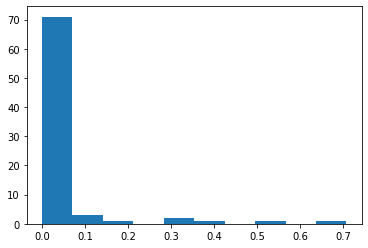

In [110]:
plt.hist(test_info[0]['info_dict']['MONK_EST'])

In [16]:
test_info[0]['info_dict']

sector  group_i  group_j   MMD_u   MMD_b   MMD_l  MONK_EST kernel  \
0   Industrials        0        2  0.6016  0.6016  0.3552    0.1032     rw   
1   Industrials        0        2  0.7184  0.7184  0.0246    0.9160     rw   
2   Industrials        0        2  0.0018  0.0018  0.0004    0.0514     rw   
3   Industrials        0        2  0.2234  0.2234  0.0086    0.5218     rw   
4   Industrials        0        2  0.0002  0.0002  0.0072    0.0022     rw   
..          ...      ...      ...     ...     ...     ...       ...    ...   
75  Industrials        0        2  0.0192  0.0192  0.3868    0.1116     rw   
76  Industrials        0        2  0.0006  0.0006  0.1828    0.0014     rw   
77  Industrials        0        2  0.0000  0.0000  0.0072    0.0008     rw   
78  Industrials        0        2  0.0000  0.0000  0.0036    0.0000     rw   
79  Industrials        0        2  0.5866  0.5866  0.0190    0.4510     rw   

     r      c       dates   dates_mid  
0   12  0.001  2015-09-06  2015-08-17  
1   12  0.001  2015-09-26  2015-09-06  
2   12  0.001  2015-10-16  2015-09-26  
3   12  0.001  2015-11-05  2015-10-16  
4   12  0.001  2015-11-25  2015-11-05  
..  ..    ...         ...         ...  
75  12  0.001  2019-10-15  2019-09-25  
76  12  0.001  2019-11-04  2019-10-15  
77  12  0.001  2019-11-24  2019-11-04  
78  12  0.001  2019-12-14  2019-11-24  
79  12  0.001  2020-01-03  2019-12-14  

[80 rows x 12 columns]

In [32]:
print(np.unique(test_info[0]['info_dict']['c']))
print(np.unique(test_info[0]['n']))

[0.001]
[20]


In [21]:
data_dict[idx]['portfolios_info']['uniform'].keys()

dict_keys(['weights', 'cov_div', 'var_div', 'omega', 'sharpe', 'sortino', 'beta', 'treynor'])

 Plot mmd and compare with diversification

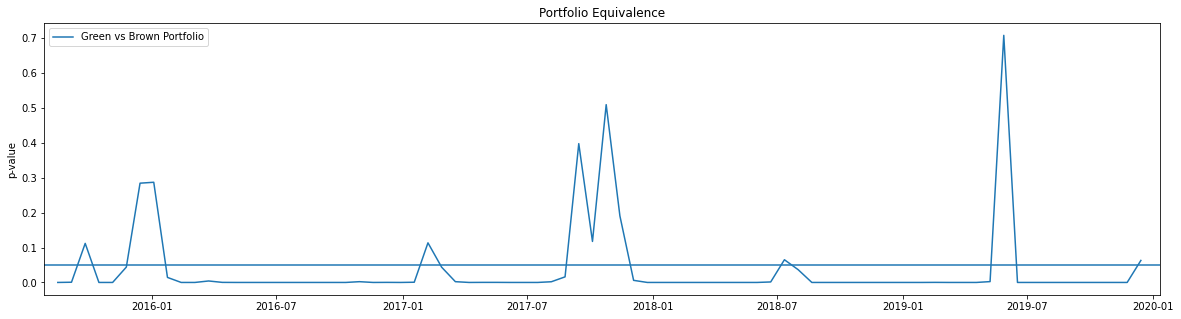

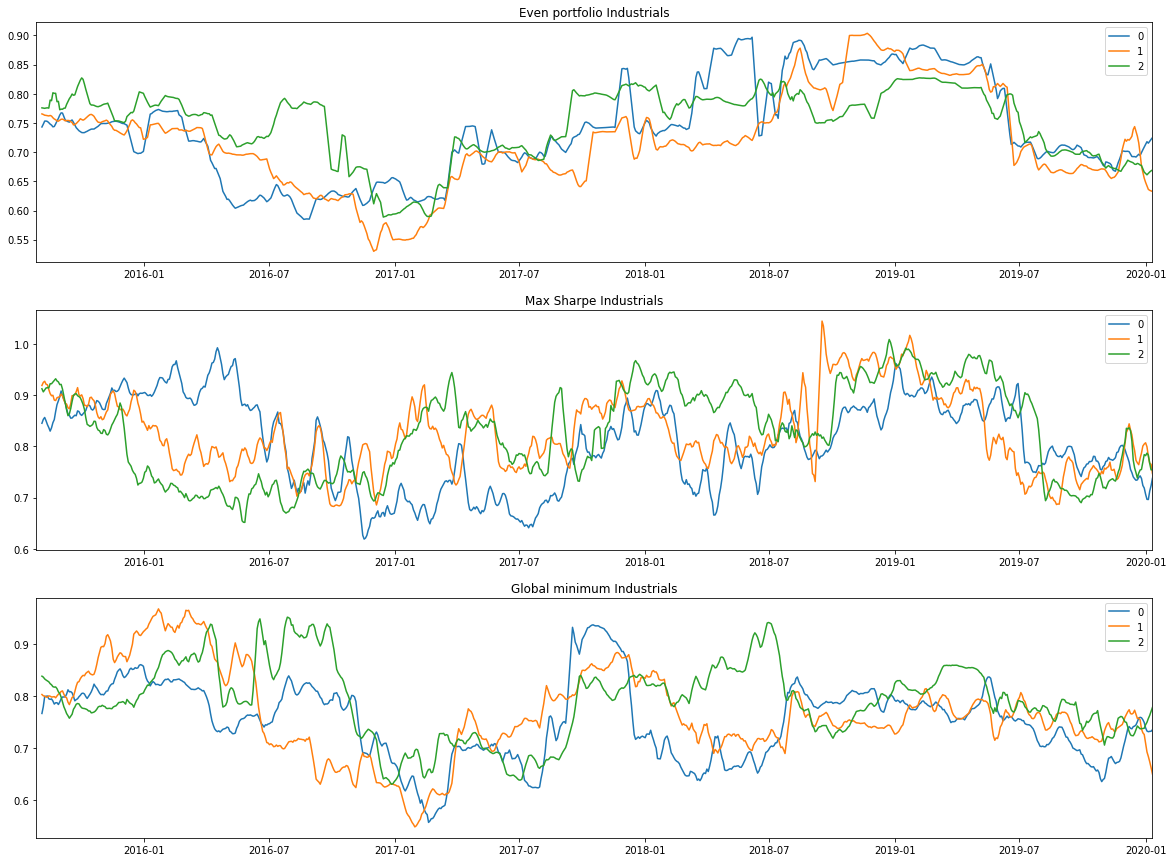

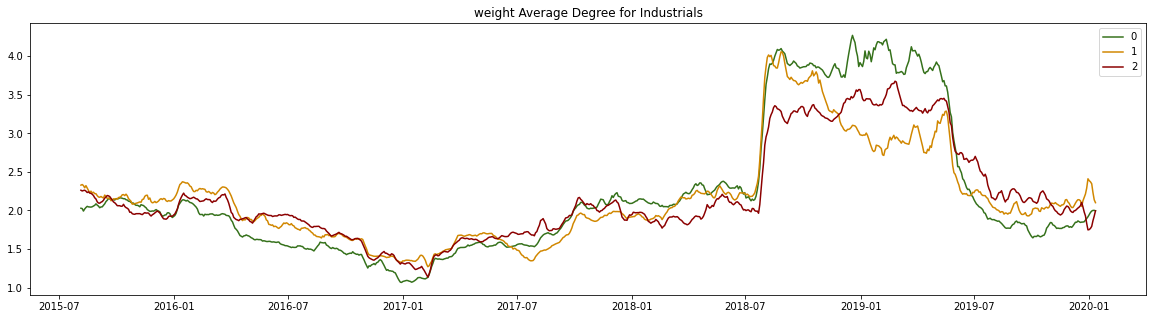

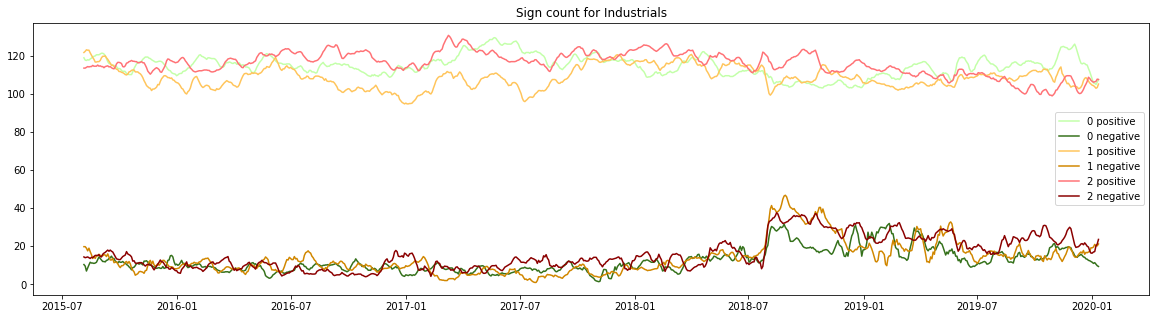

In [116]:

for idx in range(len(test_info)):
    tmp = test_info[idx]['info_dict']
    sector = test_info[idx]['sector']
    fig ,ax = plt.subplots(1,1, figsize = (20,5))

    tmp['id'] = tmp['group_i'].astype(str) + tmp['group_j'].astype(str) 
    for id in ["02"]:#np.unique(tmp['id']):
        #ax.plot(tmp['dates'].loc[tmp['id'] == id], tmp['MONK_EST'].loc[tmp['id'] == id], label = "monk")
        tmp_tmp = tmp.loc[tmp['id'] == id]

        ax.plot(tmp['dates_mid'].loc[tmp['id'] == id], tmp['MONK_EST'].loc[tmp['id'] == id].rolling(1).mean(), label = "Green vs Brown Portfolio")
        #ax.scatter(tmp['dates'].loc[tmp['id'] == id], tmp['MONK_EST'].loc[tmp['id'] == id], label = 'Green vs Brown Portfolio')
    ax.axhline(y = 0.05)
    ax.legend()
    ax.set_title('Portfolio Equivalence')
    ax.set_ylabel('p-value')
    ax.set_xlim([np.min(data_dict[idx]['dates']), np.max((np.max(data_dict[idx]['dates']),np.max(tmp['dates'])))])

    fig, ax = plt.subplots(3,1, figsize = (20,15))
    metric = 'var_div'
    pd.DataFrame(data_dict[idx]['portfolios_info']['uniform'][metric], index = data_dict[idx]['dates']).rolling(5).mean().plot(ax = ax[0], title = f'Even portfolio {sector}' )
    pd.DataFrame(data_dict[idx]['portfolios_info']['sharpe'][metric], index = data_dict[idx]['dates']).rolling(5).mean().plot(ax = ax[1], title = f'Max Sharpe {sector}')
    pd.DataFrame(data_dict[idx]['portfolios_info']['gmv'][metric], index = data_dict[idx]['dates']).rolling(5).mean().plot(ax = ax[2], title = f'Global minimum {sector}')
    ax[0].set_xlim([np.min(data_dict[idx]['dates']), np.max((np.max(data_dict[idx]['dates']),np.max(tmp['dates'])))])
    ax[1].set_xlim([np.min(data_dict[idx]['dates']), np.max((np.max(data_dict[idx]['dates']),np.max(tmp['dates'])))])
    ax[2].set_xlim([np.min(data_dict[idx]['dates']), np.max((np.max(data_dict[idx]['dates']),np.max(tmp['dates'])))])

    fig, ax = plt.subplots(1,1, figsize = (20,5))
    plot_avg_degree(data_dict[idx], weight = rw, ax = ax)
    fig, ax = plt.subplots(1,1, figsize = (20,5))
    plot_G_signs(data_dict[idx], ax = ax)

Let's test manually. Seems like there is some fishyness going on

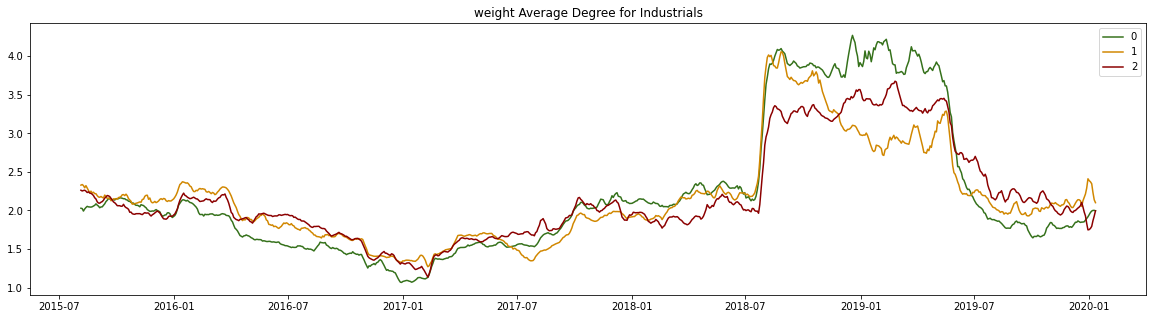

In [94]:
scale = True
trans = None
with open(f'../data/Graphs/TEST_d_1_winlen_300_gest_huge_glasso_ebic_scale_{scale}_trans_{trans}.pkl', 'rb') as f:
    data_dict = pickle.load(f)

fig, ax = plt.subplots(1,1, figsize = (20,5))
plot_avg_degree(data_dict[idx], weight = 'weight', ax = ax)

In [85]:
index = np.where((data_dict[0]['dates'] > datetime.date(2019,7,1)) & (data_dict[0]['dates'] <= datetime.date(2019,8,1)))[0]
index

array([718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730,
       731, 732], dtype=int64)

In [86]:
from util import avg_degree
G1 = [data_dict[0]['graph_dict'][0][i] for i in index] 
G2 = [data_dict[0]['graph_dict'][2][i] for i in index]
Gs = G1 + G2
#Gs = [nx.from_numpy_array(np.abs(nx.adjacency_matrix(Gs[k]).todense())) for k in range(len(Gs))]

def degreelabels( G):

    nodes_degree = dict(G.degree)
    return {key: str(value) for key, value in nodes_degree.items()}

for i in range(len(Gs)):
    nx.set_node_attributes(Gs[i], degreelabels(Gs[i]),'label')




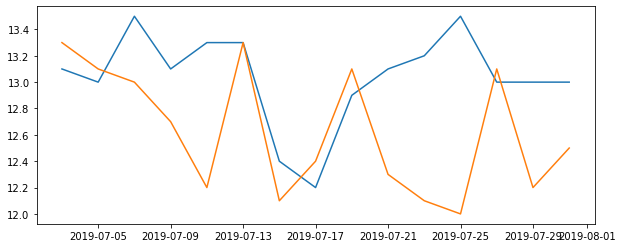

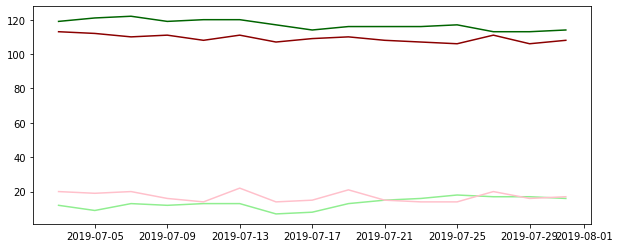

In [106]:
fig,ax = plt.subplots(1,1, figsize = (10,4))
ax.plot(data_dict[0]['dates'][index], [avg_degree(G1[i], None) for i in range(len(G1))])
ax.plot(data_dict[0]['dates'][index], [avg_degree(G2[i], None) for i in range(len(G2))])

fig,ax = plt.subplots(1,1, figsize = (10,4))
ax.plot(data_dict[0]['dates'][index], [cnt_pos_neg(G1[i], 1) for i in range(len(G1))], color = "DarkGreen")
ax.plot(data_dict[0]['dates'][index], [cnt_pos_neg(G1[i], -1) for i in range(len(G1))], color = "lightgreen")

ax.plot(data_dict[0]['dates'][index], [cnt_pos_neg(G2[i], 1) for i in range(len(G2))], color = "Darkred")
ax.plot(data_dict[0]['dates'][index], [cnt_pos_neg(G2[i], -1) for i in range(len(G2))], color = "pink")

In [88]:
sys.path.insert(0, 'C:/Users/User/Code/MMD_Graph_Diversification')
sys.path.insert(0, 'C:/Users/User/Code/MMD_Graph_Diversification/myKernels')

import MMDforGraphs as mg
from myKernels import RandomWalk as rw
n = len(G1)
rw_kernel = rw.RandomWalk(Gs, c = 0.0001, normalize=0)
K = rw_kernel.fit_ARKU_plus(r = 10, normalize_adj=False, verbose=False, edge_attr= None)

MMD_functions = [mg.MMD_b, mg.MMD_u, mg.MMD_l, mg.MONK_EST]
kernel_hypothesis = mg.BoostrapMethods(MMD_functions)
function_arguments = [dict(n = n, m = n  ), 
                    dict(n = n, m = n ),
                    dict(n = n, m = n ), 
                    #dict(Q = 3, y1 = Gs[:bg1.n], y2 = Gs[bg1.n:] )]
                    dict(Q = 5, y1 = list(range(n)), y2 = list(range(n, n+n)) )]
kernel_hypothesis.Bootstrap(K, function_arguments, B = 5000)

# Run power
#print(f'V {V}')
#print(f'ratio {ratio}')
#print(f'power {power}')
print(f'p_value {kernel_hypothesis.p_values}')
#print(f"MMD_u {kernel_hypothesis.sample_test_statistic['MMD_u']}")



C:/Users/User/Code/MMD_Graph_Diversification\myKernels\RandomWalk.py:914: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


KeyboardInterrupt: 

In [96]:
sys.path.insert(0, 'C:/Users/User/Code/MMD_Graph_Diversification')
sys.path.insert(0, 'C:/Users/User/Code/MMD_Graph_Diversification/myKernels')

import MMDforGraphs as mg
from myKernels import RandomWalk as rw
n = len(G1)
rw_kernel = rw.RandomWalk(Gs, c = 0.0001, normalize=0)
K = rw_kernel.fit_ARKU_edge(r = 10, verbose=False, edge_attr= 'weight', edge_label_tag='sign', edge_labels=[-1,1])

MMD_functions = [mg.MMD_b, mg.MMD_u, mg.MMD_l, mg.MONK_EST]
kernel_hypothesis = mg.BoostrapMethods(MMD_functions)
function_arguments = [dict(n = n, m = n  ), 
                    dict(n = n, m = n ),
                    dict(n = n, m = n ), 
                    #dict(Q = 3, y1 = Gs[:bg1.n], y2 = Gs[bg1.n:] )]
                    dict(Q = 5, y1 = list(range(n)), y2 = list(range(n, n+n)) )]
kernel_hypothesis.Bootstrap(K, function_arguments, B = 5000)

# Run power
#print(f'V {V}')
#print(f'ratio {ratio}')
#print(f'power {power}')
print(f'p_value {kernel_hypothesis.p_values}')
#print(f"MMD_u {kernel_hypothesis.sample_test_statistic['MMD_u']}")

C:/Users/User/Code/MMD_Graph_Diversification\myKernels\RandomWalk.py:975: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A[idx] = scipy.sparse.csr_matrix(np.abs(nx.linalg.adjacency_matrix(G_tmp, weight = edge_attr)), dtype=np.float64)


p_value {'MMD_b': 0.0, 'MMD_u': 0.0, 'MMD_l': 0.0, 'MONK_EST': 0.0004}


In [97]:
sys.path.insert(0, 'C:/Users/User/Code/MMD_Graph_Diversification')
sys.path.insert(0, 'C:/Users/User/Code/MMD_Graph_Diversification/myKernels')

import MMDforGraphs as mg
from myKernels import RandomWalk as rw
n = len(G1)
rw_kernel = rw.RandomWalk(Gs, c = 0.0001, normalize=0)
K = rw_kernel.fit_ARKU_edge(r = 10, verbose=False, edge_attr= None, edge_label_tag='sign', edge_labels=[-1,1])

MMD_functions = [mg.MMD_b, mg.MMD_u, mg.MMD_l, mg.MONK_EST]
kernel_hypothesis = mg.BoostrapMethods(MMD_functions)
function_arguments = [dict(n = n, m = n  ), 
                    dict(n = n, m = n ),
                    dict(n = n, m = n ), 
                    #dict(Q = 3, y1 = Gs[:bg1.n], y2 = Gs[bg1.n:] )]
                    dict(Q = 5, y1 = list(range(n)), y2 = list(range(n, n+n)) )]
kernel_hypothesis.Bootstrap(K, function_arguments, B = 5000)

# Run power
#print(f'V {V}')
#print(f'ratio {ratio}')
#print(f'power {power}')
print(f'p_value {kernel_hypothesis.p_values}')
#print(f"MMD_u {kernel_hypothesis.sample_test_statistic['MMD_u']}")

C:/Users/User/Code/MMD_Graph_Diversification\myKernels\RandomWalk.py:975: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A[idx] = scipy.sparse.csr_matrix(np.abs(nx.linalg.adjacency_matrix(G_tmp, weight = edge_attr)), dtype=np.float64)


p_value {'MMD_b': 0.0, 'MMD_u': 0.0, 'MMD_l': 0.0, 'MONK_EST': 0.0}


In [108]:
import grakel as gk
n = len(G1)
graph_list = gk.graph_from_networkx(Gs, node_labels_tag='label')  # Convert to graphs to Grakel format
kernel = [{"name": "weisfeiler_lehman", "n_iter": 1}, {"name": "vertex_histogram"}]
init_kernel = gk.GraphKernel(kernel= kernel, normalize=0)
K = init_kernel.fit_transform(graph_list)

MMD_functions = [mg.MMD_b, mg.MMD_u, mg.MMD_l, mg.MONK_EST]
kernel_hypothesis = mg.BoostrapMethods(MMD_functions)
function_arguments = [dict(n = n, m = n  ), 
                    dict(n = n, m = n ),
                    dict(n = n, m = n ), 
                    #dict(Q = 3, y1 = Gs[:bg1.n], y2 = Gs[bg1.n:] )]
                    dict(Q = 5, y1 = list(range(n)), y2 = list(range(n, n+n)) )]
kernel_hypothesis.Bootstrap(K, function_arguments, B = 5000)

# Run power
#print(f'V {V}')
#print(f'ratio {ratio}')
#print(f'power {power}')
print(f'p_value {kernel_hypothesis.p_values}')
#print(f"MMD_u {kernel_hypothesis.sample_test_statistic['MMD_u']}")


p_value {'MMD_b': 0.0, 'MMD_u': 0.0, 'MMD_l': 0.0, 'MONK_EST': 0.0988}


<AxesSubplot:>

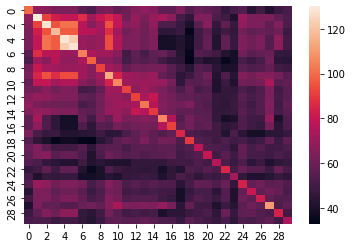

In [90]:
import seaborn as sns
sns.heatmap(K)

# Sklean glasso using 3 folds

In [7]:
with open(f'../data/Graphs/case_study_1_d_1_winlen_150_gest_sklearn_glasso_scale_None.pkl', 'rb') as f:
    data_dict = pickle.load(f)
data_dict[0].keys()

FileNotFoundError: [Errno 2] No such file or directory: '../data/Graphs/TEST_d_1_winlen_300_gest_huge_glasso_ebic_scale_True_trans_None_n_30_B_5000_rw_weight_dstep_10_glabel_None_wfun_None.pkl'

Graph statistics

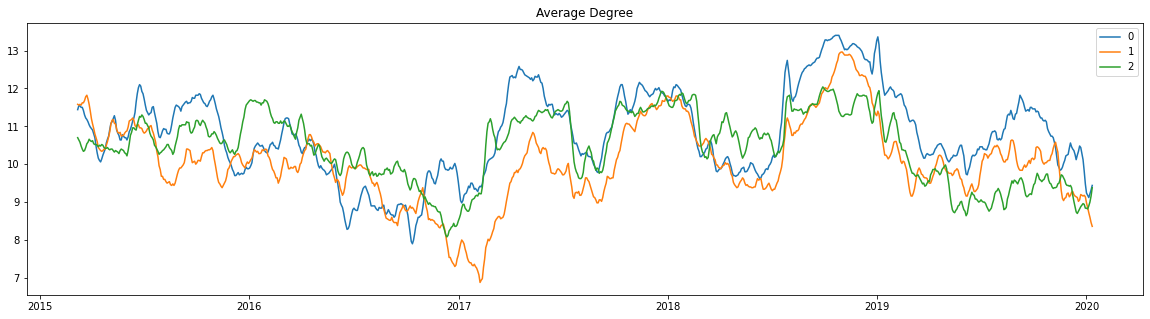

In [262]:
for idx in range(len(data_dict)):

    avg_deg_0 = [np.mean([j for i, j in data_dict[idx]['graph_dict'][0][j].degree]) for j in range(len(data_dict[idx]['graph_dict'][0]))]
    avg_deg_1 = [np.mean([j for i, j in data_dict[idx]['graph_dict'][1][j].degree]) for j in range(len(data_dict[idx]['graph_dict'][1]))] 
    avg_deg_2 = [np.mean([j for i, j in data_dict[idx]['graph_dict'][2][j].degree]) for j in range(len(data_dict[idx]['graph_dict'][2]))]

    fig, ax = plt.subplots(1,1, figsize = (20,5))
    ax.plot(data_dict[idx]['dates'], pd.DataFrame(avg_deg_0).rolling(5).mean().iloc[:,0], label = 0)
    ax.plot(data_dict[idx]['dates'], pd.DataFrame(avg_deg_1).rolling(5).mean().iloc[:,0], label = 1) 
    ax.plot(data_dict[idx]['dates'], pd.DataFrame(avg_deg_2).rolling(5).mean().iloc[:,0], label = 2)
    ax.set_title('Average Degree')
    ax.legend() 

Histogram of portfolio weights

(-10.0, 10.0)

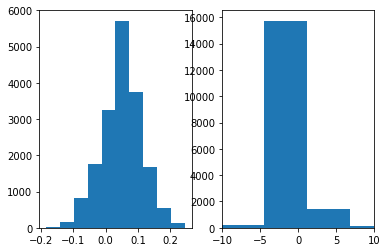

In [263]:
fig, ax = plt.subplots(1,2)
_ = ax[0].hist(np.hstack(data_dict[idx]['GMV_portfolio_dict'][0]))
_ = ax[1].hist(np.hstack(data_dict[idx]['max_sharpe_portfolio_dict'][0]), bins = 1000)
ax[1].set_xlim([-10,10])

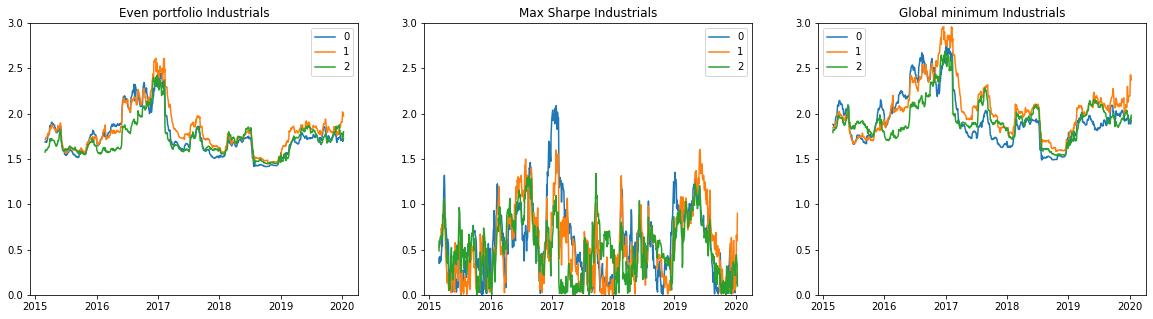

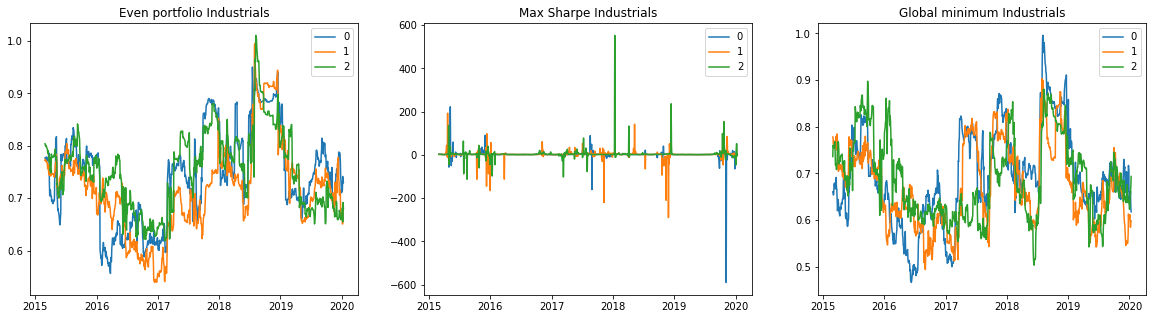

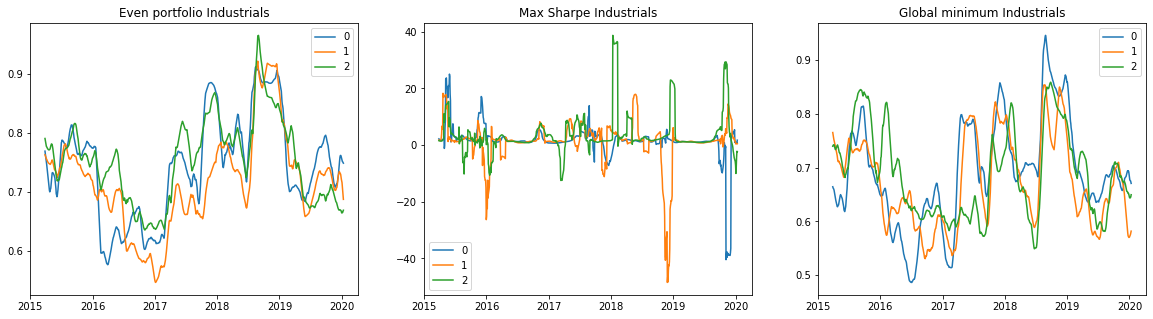

In [264]:
for idx in range(len(data_dict)):
    sector = data_dict[idx]['sector']


    fig, ax = plt.subplots(1,3, figsize = (20,5))
    pd.DataFrame(data_dict[idx]['uni_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[0], title = f'Even portfolio {sector}', ylim = [0,3])
    pd.DataFrame(data_dict[idx]['sharpe_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[1], title = f'Max Sharpe {sector}', ylim = [0,3])
    pd.DataFrame(data_dict[idx]['gmv_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[2], title = f'Global minimum {sector}', ylim = [0,3])

    fig, ax = plt.subplots(1,3, figsize = (20,5))
    pd.DataFrame(data_dict[idx]['uni_var_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[0], title = f'Even portfolio {sector}' )
    pd.DataFrame(data_dict[idx]['sharpe_var_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[1], title = f'Max Sharpe {sector}')
    pd.DataFrame(data_dict[idx]['gmv_var_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[2], title = f'Global minimum {sector}')

    fig, ax = plt.subplots(1,3, figsize = (20,5))
    pd.DataFrame(data_dict[idx]['uni_var_div_dict'], index = data_dict[idx]['dates']).rolling(15).mean().plot(ax = ax[0], title = f'Even portfolio {sector}' )
    pd.DataFrame(data_dict[idx]['sharpe_var_div_dict'], index = data_dict[idx]['dates']).rolling(15).mean().plot(ax = ax[1], title = f'Max Sharpe {sector}')
    pd.DataFrame(data_dict[idx]['gmv_var_div_dict'], index = data_dict[idx]['dates']).rolling(15).mean().plot(ax = ax[2], title = f'Global minimum {sector}')

# Huge Glasso EBIC

In [17]:
with open(f'../data/Graphs/case_study_1_d_1_winlen_300_gest_huge_glasso_ebic_scale_None.pkl', 'rb') as f:
    data_dict = pickle.load(f)
data_dict[0].keys()

dict_keys(['dates', 'graph_dict', 'sector', 'cov_dict', 'GMV_portfolio_dict', 'max_sharpe_portfolio_dict', 'return_dict', 'window_size', 'stock_partition', 'gmv_div_dict', 'gmv_var_div_dict', 'sharpe_div_dict', 'sharpe_var_div_dict', 'uni_div_dict', 'uni_var_div_dict', 'cov_dict2', 'GMV_portfolio_dict2', 'max_sharpe_portfolio_dict2', 'return_dict2', 'gmv_div_dict2', 'gmv_var_div_dict2', 'sharpe_div_dict2', 'sharpe_var_div_dict2', 'uni_div_dict2', 'uni_var_div_dict2'])

Plot graph statistics

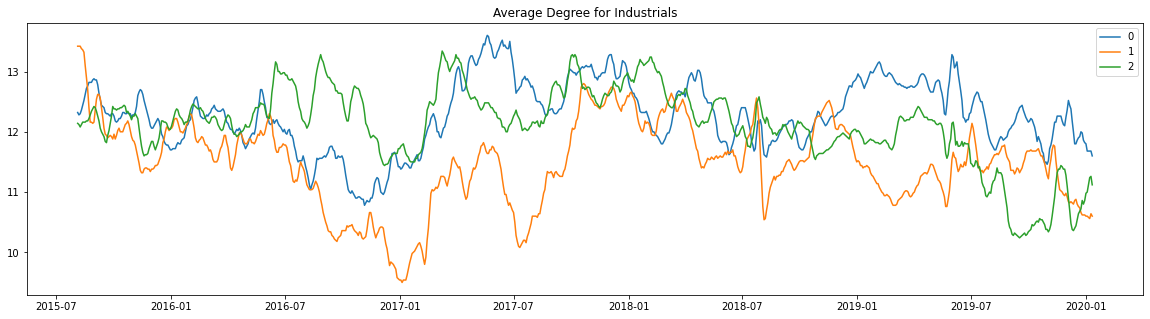

In [18]:
for idx in range(len(data_dict)):
    plot_avg_degree(data_dict[idx])

Look if companies are often jumping

# new